# **BAN 6025 Final Project: Airbnb in Austin, TX**

- Authors: Anthony Ayala & Jennifer Ontiveros-Olivas
- Date: 12/13/2023

### What we will deliver:
- You may use any analytical techniques and any software that you have available to you to develop your report (even if you did not specifically learn the methods in BAN 6025). That said, you MUST use AT LEAST THREE of the techniques that you have learned in BAN 6025 to analyze the data. The techniques that were covered in BAN 6025 include linear regression, forecasting,logistic regression, classification trees, and k-means clustering. Again, you are not limited to these techniques, but you should use at least three of them in your analysis. Your final deliverable will be a short executive summary style report of your findings. The report should be a maximum of three pages (excluding tables and figures).

### The report should include:
- A statement of the business problem being addressed
- An overview of the Airbnb data utilized for your analysis
- A brief summary of the analytical techniques that were applied
- A thorough discussion of your findings (that should address the four bullet points outlined above)
- A conclusion with recommendations for the real estate investor that will help him to be successful as he enters the Airbnb market in Austin Texas

### Using the data provided. you need to produce a report that will provide your client with an overview of the Airbnb rental market. Your report should address the following issues that are to the client:
- What are the key factors driving the nightly rental price for units in the Austin area?
- What are the key factors driving the probability of keeping a unit booked in the Austin area? To answer this question, you can classify a unit as “booked” if the 90-day availability for the property is less than 40%.
- How important are guest reviews and ratings? Is there anything the host could do to improve those ratings?
- Segment the Airbnb properties in the Austin area into different groups. Provide a profile of each segment. Which segments command the highest nightly rates? Which segments get the best guest ratings? Which segments have the highest percentage of “booked” units?

---

## Data Context:
- Short term rental properties have become a popular investment strategy for many individuals interested in generating a passive income stream. However, the dynamics of the short term rental market are complex, and it can be difficult to know what features tend to draw in potential renters, what factors have the most influence on ratings, what information to highlight on the listing, and how to gauge the potential occupancy rate for a property.

You work for a real estate investor who is considering an investment property in Austin, TX with the goal of listing the property for rent on Airbnb. You have been provided with a data set that contains information on almost 6000 Airbnb rental units in Austin.

In [1]:
# Import libraries
# Import the important libraries

from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --------------------------------
# Suppress scientific notation in the notebook for pandas DataFrame
pd.set_option('display.float_format', '{:.4f}'.format)

# Logistic Regression libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel

# Tree libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Predictive Analytics Final Project/airbnb_listings_austin.csv'  #Jennifer's File Path: '/content/drive/MyDrive/Predictive Analytics - Dr. Balan/airbnb_listings_austin.csv'
df = pd.read_csv(data_path)
df.head()

id                           listing_url  \
0    72635    https://www.airbnb.com/rooms/72635   
1  5386323  https://www.airbnb.com/rooms/5386323   
2  8826517  https://www.airbnb.com/rooms/8826517   
3  8828616  https://www.airbnb.com/rooms/8828616   
4  8536913  https://www.airbnb.com/rooms/8536913   

                             name  \
0   3 Private Bedrooms, SW Austin   
1                 Cricket Trailer   
2  Private room 1 in South Austin   
3  Private room 2 in South Austin   
4       Brand-New 3BR Austin Home   

                                             summary  \
0  Conveniently located 10-15 from downtown in SW...   
1  Rent this cool concept trailer that has everyt...   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4  Brand-new 3BR/2BA Austin home with landscaped ...   

                                               space  \
0  We have three spare bedrooms, each with a quee...   
1  Rental arrangements for this trailer allows yo...   
2                                                NaN   
3                                                NaN   
4  Feel instantly at home at our brand new 3BR/2B...   

                                         description experiences_offered  \
0  Conveniently located 10-15 from downtown in SW...                none   
1  Rent this cool concept trailer that has everyt...                none   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...                none   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...                none   
4  Brand-new 3BR/2BA Austin home with landscaped ...                none   

                               neighborhood_overview notes  \
0  Location and convenience are key.  Easy access...   NaN   
1  We're talking about wherever you'd like in the...   NaN   
2                                                NaN   NaN   
3                                                NaN   NaN   
4  Entertainment and activities are plentiful her...   NaN   

                                             transit  ...  number_of_reviews  \
0  Unfortunately there is no convenient public tr...  ...                  1   
1  Bike, Bus, Metrorail, etc. you name it we've g...  ...                  0   
2                                                NaN  ...                  0   
3                                                NaN  ...                  0   
4                                                NaN  ...                  0   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0             100.0000                10.0000                   10.0000   
1                  NaN                    NaN                       NaN   
2                  NaN                    NaN                       NaN   
3                  NaN                    NaN                       NaN   
4                  NaN                    NaN                       NaN   

  review_scores_checkin review_scores_communication review_scores_location  \
0               10.0000                     10.0000                10.0000   
1                   NaN                         NaN                    NaN   
2                   NaN                         NaN                    NaN   
3                   NaN                         NaN                    NaN   
4                   NaN                         NaN                    NaN   

  review_scores_value  instant_bookable cancellation_policy  
0             10.0000                 f            moderate  
1                 NaN                 f            moderate  
2                 NaN                 f            flexible  
3                 NaN                 f            flexible  
4                 NaN                 f              strict  

[5 rows x 54 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2412 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

## Create booked variable where we classify a unit as "booked" if the 90-day availability for the property is less than 40%
- 40% of 90 is 36 days

In [5]:
df['booked'] = df['availability_90'].apply(lambda x: 1 if x < 36 else 0)
print(df['booked'].value_counts())

0    4038
1    1797
Name: booked, dtype: int64


## Null Analysis & Handling Nulls

In [6]:
df.isnull().sum()

id                                0
listing_url                       0
name                              0
summary                         462
space                          1360
description                       3
experiences_offered               0
neighborhood_overview          2263
notes                          3423
transit                        2343
host_id                           0
host_name                        15
host_since                       15
host_location                    25
host_about                     1861
host_response_time             1658
host_response_rate             1658
host_is_superhost                15
host_listings_count              15
host_has_profile_pic             15
host_identity_verified           15
neighbourhood                  1035
city                              0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        46
bedrooms                    

In [7]:
# Unique value counts of columns that we might consider to drop
Unique = ['id', 'listing_url', 'name', 'summary','space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'host_id', 'host_name', 'host_about', 'neighbourhood', 'square_feet']
for x in Unique:
    print(f'Column:{x},', df[x].nunique())

Column:id, 5835
Column:listing_url, 5835
Column:name, 5784
Column:summary, 5261
Column:space, 4421
Column:description, 5791
Column:experiences_offered, 1
Column:neighborhood_overview, 3379
Column:notes, 2155
Column:transit, 3306
Column:host_id, 4633
Column:host_name, 1888
Column:host_about, 2946
Column:neighbourhood, 79
Column:square_feet, 108


In [8]:
df['host_since'].fillna(df['host_since'].mode()[0], inplace=True)
df['host_location'].fillna(df['host_location'].mode()[0], inplace=True)
df['host_response_time'].fillna(df['host_response_time'].mode()[0], inplace=True)
df['host_response_rate'].fillna("0%", inplace=True)
df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0], inplace=True)
df['host_listings_count'].fillna(df['host_listings_count'].mode()[0], inplace=True)
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
df['neighbourhood'].fillna(df['neighbourhood'].mode()[0], inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)
# Remove non-numeric characters like '$' and ',' from the 'security_deposit' column
df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df['security_deposit'].fillna(0, inplace=True)
df['weekly_price'] = df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
df['weekly_price'].fillna(df['weekly_price'].median(), inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)
df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].median(), inplace=True)
df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median(), inplace=True)
df['review_scores_checkin'].fillna(df['review_scores_checkin'].median(), inplace=True)
df['review_scores_communication'].fillna(df['review_scores_communication'].median(), inplace=True)
df['review_scores_location'].fillna(df['review_scores_location'].median(), inplace=True)
df['review_scores_value'].fillna(df['review_scores_value'].median(), inplace=True)

# drop unnecessary columns
df.drop(columns=['id', 'listing_url', 'name', 'summary','space', 'description', 'neighborhood_overview', 'notes',
                 'transit', 'host_id', 'host_name', 'host_about', 'neighbourhood', 'square_feet'], inplace=True)
print(df.isnull().sum())
df.head()

experiences_offered            0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
host_identity_verified         0
city                           0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
price                          0
weekly_price                   0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_

experiences_offered  host_since                 host_location  \
0                none    2/4/2011  Austin, Texas, United States   
1                none   2/17/2015  Austin, Texas, United States   
2                none  10/10/2015  Austin, Texas, United States   
3                none  10/10/2015  Austin, Texas, United States   
4                none   4/13/2015                            US   

   host_response_time host_response_rate host_is_superhost  \
0      within an hour                 0%                 f   
1      within an hour                 0%                 f   
2      within an hour                 0%                 f   
3      within an hour                 0%                 f   
4  within a few hours                98%                 f   

   host_listings_count host_has_profile_pic host_identity_verified    city  \
0               1.0000                    t                      f  Austin   
1               1.0000                    t                      t  Austin   
2               2.0000                    t                      t  Austin   
3               2.0000                    t                      t  Austin   
4             301.0000                    t                      t  Austin   

   ... review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0  ...             100.0000                10.0000                    10.0000   
1  ...              98.0000                10.0000                    10.0000   
2  ...              98.0000                10.0000                    10.0000   
3  ...              98.0000                10.0000                    10.0000   
4  ...              98.0000                10.0000                    10.0000   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                10.0000                      10.0000                 10.0000   
1                10.0000                      10.0000                 10.0000   
2                10.0000                      10.0000                 10.0000   
3                10.0000                      10.0000                 10.0000   
4                10.0000                      10.0000                 10.0000   

  review_scores_value instant_bookable cancellation_policy  booked  
0             10.0000                f            moderate       1  
1             10.0000                f            moderate       0  
2             10.0000                f            flexible       0  
3             10.0000                f            flexible       0  
4             10.0000                f              strict       0  

[5 rows x 41 columns]

## Descriptive Statistics

       host_listings_count  accommodates  bathrooms  bedrooms      beds  \
count            5835.0000     5835.0000  5835.0000 5835.0000 5835.0000   
mean               11.7393        4.3882     1.4758    1.7380    2.2115   
std                55.0897        2.6891     0.7727    1.1364    1.6478   
min                 1.0000        1.0000     0.0000    0.0000    1.0000   
25%                 1.0000        2.0000     1.0000    1.0000    1.0000   
50%                 1.0000        4.0000     1.0000    1.0000    2.0000   
75%                 2.0000        6.0000     2.0000    2.0000    3.0000   
max               339.0000       16.0000     8.0000   10.0000   16.0000   

       weekly_price  security_deposit  guests_included  minimum_nights  \
count     5835.0000         5835.0000        5835.0000       5835.0000   
mean      1008.2538          197.0518           1.8805          2.1018   
std       1016.3097          377.3619           1.7734          5.5850   
min         95.0000         

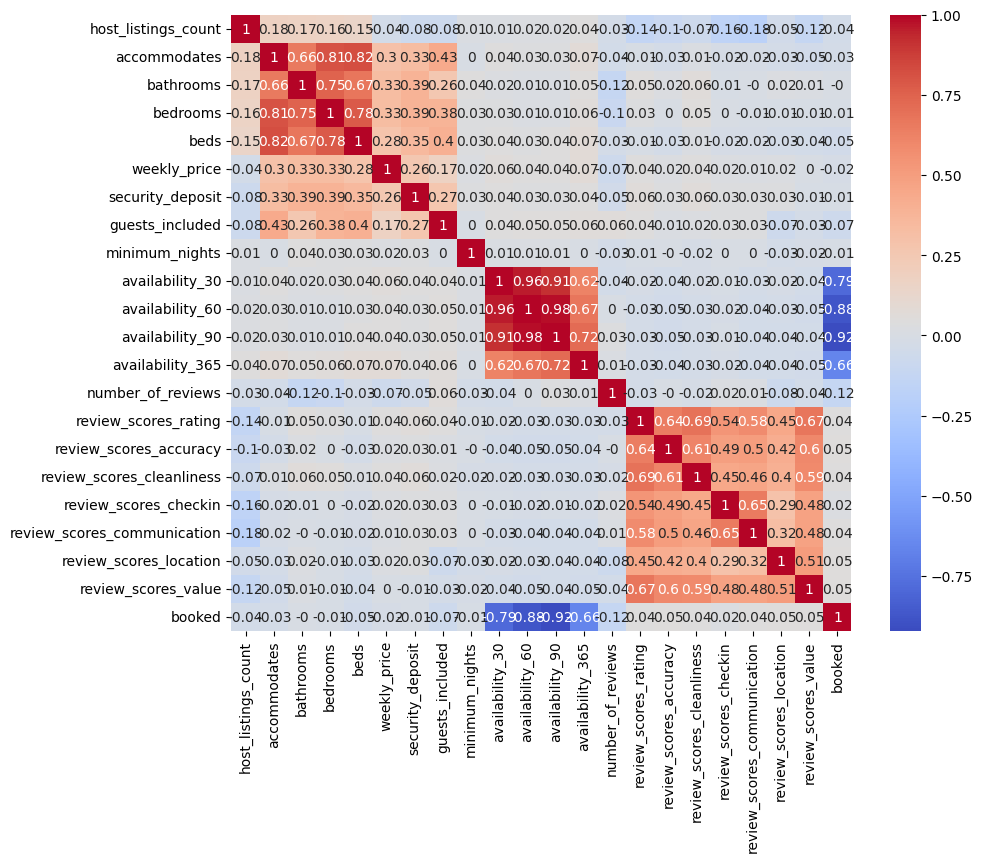

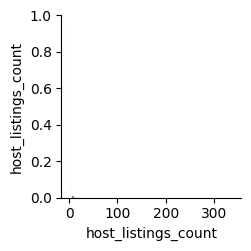

In [9]:
# Display summary statistics for numeric variables
print(df.describe())

# Compute correlations
cormat = df.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Create scatterplot matrix
sns.pairplot(df.iloc[:,:12])
plt.show()

## Data Prep for Decision Tree

In [10]:
# Take categorical columns into numerical dummies where each category is replaced by a number starting with 0
def dummyize (x, columns):
  for column in range(0,len(columns)):
    if x == columns[column]:
      return column

In [11]:
# Assuming df is your DataFrame
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['experiences_offered', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'city',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'extra_people', 'has_availability', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

In [12]:
# We will drop availability_90 as the booked column was created by availability, which is a strong influencer in determining if an Airbnb was booked or not
df = df.drop(columns=['availability_90'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiences_offered          5835 non-null   object 
 1   host_since                   5835 non-null   object 
 2   host_location                5835 non-null   object 
 3   host_response_time           5835 non-null   object 
 4   host_response_rate           5835 non-null   object 
 5   host_is_superhost            5835 non-null   object 
 6   host_listings_count          5835 non-null   float64
 7   host_has_profile_pic         5835 non-null   object 
 8   host_identity_verified       5835 non-null   object 
 9   city                         5835 non-null   object 
 10  property_type                5835 non-null   object 
 11  room_type                    5835 non-null   object 
 12  accommodates                 5835 non-null   int64  
 13  bathrooms         

In [13]:
strings = ['experiences_offered', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'city',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'extra_people', 'has_availability', 'instant_bookable',
       'cancellation_policy']
for x in strings:
    print(f'Column:{x},', df[x].nunique()) # We create dummies for the columns that have less than 10 unique values

Column:experiences_offered, 1
Column:host_since, 1578
Column:host_location, 171
Column:host_response_time, 4
Column:host_response_rate, 51
Column:host_is_superhost, 2
Column:host_has_profile_pic, 2
Column:host_identity_verified, 2
Column:city, 12
Column:property_type, 18
Column:room_type, 3
Column:bed_type, 5
Column:amenities, 4474
Column:price, 468
Column:cleaning_fee, 101
Column:extra_people, 59
Column:has_availability, 1
Column:instant_bookable, 2
Column:cancellation_policy, 5


In [14]:
df[['experiences_offered', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'city',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'extra_people', 'has_availability', 'instant_bookable',
       'cancellation_policy']].head()

experiences_offered  host_since                 host_location  \
0                none    2/4/2011  Austin, Texas, United States   
1                none   2/17/2015  Austin, Texas, United States   
2                none  10/10/2015  Austin, Texas, United States   
3                none  10/10/2015  Austin, Texas, United States   
4                none   4/13/2015                            US   

   host_response_time host_response_rate host_is_superhost  \
0      within an hour                 0%                 f   
1      within an hour                 0%                 f   
2      within an hour                 0%                 f   
3      within an hour                 0%                 f   
4  within a few hours                98%                 f   

  host_has_profile_pic host_identity_verified    city property_type  \
0                    t                      f  Austin         House   
1                    t                      t  Austin     Camper/RV   
2                    t                      t  Austin         House   
3                    t                      t  Austin         House   
4                    t                      t  Austin         House   

         room_type  bed_type  \
0     Private room  Real Bed   
1     Private room     Futon   
2     Private room  Real Bed   
3     Private room  Real Bed   
4  Entire home/apt  Real Bed   

                                           amenities     price cleaning_fee  \
0  {"Cable TV",Internet,"Wireless Internet","Air ...  $300.00             0   
1  {"Air Conditioning",Heating,"Family/Kid Friend...   $99.00       $75.00    
2  {TV,"Cable TV",Internet,"Wireless Internet","A...  $100.00             0   
3  {TV,"Cable TV",Internet,"Wireless Internet","A...  $100.00             0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...  $599.00      $125.00    

  extra_people has_availability instant_bookable cancellation_policy  
0       $0.00                 t                f            moderate  
1       $0.00                 t                f            moderate  
2       $0.00                 t                f            flexible  
3       $0.00                 t                f            flexible  
4       $0.00                 t                f              strict

### Dummyizing variables

In [15]:
# Display unique values before applying dummyize
print("Unique values before dummyization:", df['experiences_offered'].unique())
print("Unique values before dummyization:", df['host_response_time'].unique())
print("Unique values before dummyization:", df['host_is_superhost'].unique())
print("Unique values before dummyization:", df['host_has_profile_pic'].unique())
print("Unique values before dummyization:", df['host_identity_verified'].unique())
print("Unique values before dummyization:", df['room_type'].unique())
print("Unique values before dummyization:", df['bed_type'].unique())
print("Unique values before dummyization:", df['instant_bookable'].unique())
print("Unique values before dummyization:", df['cancellation_policy'].unique())


# Apply the code
df['experiences_offered'] = df['experiences_offered'].apply(lambda x: dummyize(x, pd.get_dummies(df['experiences_offered']).columns))
df['host_response_time'] = df['host_response_time'].apply(lambda x: dummyize(x, pd.get_dummies(df['host_response_time']).columns))
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: dummyize(x, pd.get_dummies(df['host_is_superhost']).columns))
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x: dummyize(x, pd.get_dummies(df['host_has_profile_pic']).columns))
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: dummyize(x, pd.get_dummies(df['host_identity_verified']).columns))
df['room_type'] = df['room_type'].apply(lambda x: dummyize(x, pd.get_dummies(df['room_type']).columns))
df['bed_type'] = df['bed_type'].apply(lambda x: dummyize(x, pd.get_dummies(df['bed_type']).columns))
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: dummyize(x, pd.get_dummies(df['instant_bookable']).columns))
df['cancellation_policy'] = df['cancellation_policy'].apply(lambda x: dummyize(x, pd.get_dummies(df['cancellation_policy']).columns))

# Display unique values after applying dummyize
print("Unique values after dummyization:", df['experiences_offered'].unique())
print("Unique values after dummyization:", df['host_response_time'].unique())
print("Unique values after dummyization:", df['host_is_superhost'].unique())
print("Unique values after dummyization:", df['host_has_profile_pic'].unique())
print("Unique values after dummyization:", df['host_identity_verified'].unique())
print("Unique values after dummyization:", df['room_type'].unique())
print("Unique values after dummyization:", df['bed_type'].unique())
print("Unique values after dummyization:", df['instant_bookable'].unique())
print("Unique values after dummyization:", df['cancellation_policy'].unique())

Unique values before dummyization: ['none']
Unique values before dummyization: ['within an hour' 'within a few hours' 'within a day' 'a few days or more']
Unique values before dummyization: ['f' 't']
Unique values before dummyization: ['t' 'f']
Unique values before dummyization: ['f' 't']
Unique values before dummyization: ['Private room' 'Entire home/apt' 'Shared room']
Unique values before dummyization: ['Real Bed' 'Futon' 'Airbed' 'Pull-out Sofa' 'Couch']
Unique values before dummyization: ['f' 't']
Unique values before dummyization: ['moderate' 'flexible' 'strict' 'super_strict_30' 'no_refunds']
Unique values after dummyization: [0]
Unique values after dummyization: [3 2 1 0]
Unique values after dummyization: [0 1]
Unique values after dummyization: [1 0]
Unique values after dummyization: [0 1]
Unique values after dummyization: [1 0 2]
Unique values after dummyization: [4 2 0 3 1]
Unique values after dummyization: [0 1]
Unique values after dummyization: [1 0 3 4 2]


In [16]:
# Create a decision tree data
df_dt = df
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiences_offered          5835 non-null   int64  
 1   host_since                   5835 non-null   object 
 2   host_location                5835 non-null   object 
 3   host_response_time           5835 non-null   int64  
 4   host_response_rate           5835 non-null   object 
 5   host_is_superhost            5835 non-null   int64  
 6   host_listings_count          5835 non-null   float64
 7   host_has_profile_pic         5835 non-null   int64  
 8   host_identity_verified       5835 non-null   int64  
 9   city                         5835 non-null   object 
 10  property_type                5835 non-null   object 
 11  room_type                    5835 non-null   int64  
 12  accommodates                 5835 non-null   int64  
 13  bathrooms         

In [17]:
# What columns are still in a string format, and let's consider what we may want to keep!
object_columns = df_dt.select_dtypes(include='object').columns
object_columns

Index(['host_since', 'host_location', 'host_response_rate', 'city',
       'property_type', 'amenities', 'price', 'cleaning_fee', 'extra_people',
       'has_availability'],
      dtype='object')

We will select certain variables when we get to the create a decision tree section

## Data prep for Regression
- We will have to convert some data into numeric data for regressions, which include price, cleaning_fee, host_response_rate, extra_people


In [18]:
df[object_columns].head() # We can drop host_since, host_location, city, property_type, amenities, and has_availability

host_since                 host_location host_response_rate    city  \
0    2/4/2011  Austin, Texas, United States                 0%  Austin   
1   2/17/2015  Austin, Texas, United States                 0%  Austin   
2  10/10/2015  Austin, Texas, United States                 0%  Austin   
3  10/10/2015  Austin, Texas, United States                 0%  Austin   
4   4/13/2015                            US                98%  Austin   

  property_type                                          amenities     price  \
0         House  {"Cable TV",Internet,"Wireless Internet","Air ...  $300.00    
1     Camper/RV  {"Air Conditioning",Heating,"Family/Kid Friend...   $99.00    
2         House  {TV,"Cable TV",Internet,"Wireless Internet","A...  $100.00    
3         House  {TV,"Cable TV",Internet,"Wireless Internet","A...  $100.00    
4         House  {TV,"Cable TV",Internet,"Wireless Internet","A...  $599.00    

  cleaning_fee extra_people has_availability  
0            0       $0.00                 t  
1      $75.00        $0.00                 t  
2            0       $0.00                 t  
3            0       $0.00                 t  
4     $125.00        $0.00                 t

In [19]:
# Convert date strings to datetime objects
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Remove percentage signs and convert to numeric
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')

# Convert the 'host_is_superhost', 'price', 'cleaning_fee', and 'extra_people' to numeric, handling non-numeric values
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'].str.replace('$', '').str.replace(',', ''))
df['extra_people'] = pd.to_numeric(df['extra_people'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# drop unnecessary columns
df.drop(columns=['experiences_offered','host_since', 'host_location', 'city', 'property_type', 'amenities','has_availability'], inplace=True)

# After conversion, you can again check the data types
print(df.dtypes)

host_response_time               int64
host_response_rate               int64
host_is_superhost                int64
host_listings_count            float64
host_has_profile_pic             int64
host_identity_verified           int64
room_type                        int64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                         int64
price                          float64
weekly_price                   float64
security_deposit               float64
cleaning_fee                   float64
guests_included                  int64
extra_people                   float64
minimum_nights                   int64
availability_30                  int64
availability_60                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness

In [20]:
df.isnull().sum()

host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_listings_count               0
host_has_profile_pic              0
host_identity_verified            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
weekly_price                      0
security_deposit                  0
cleaning_fee                   2248
guests_included                   0
extra_people                      0
minimum_nights                    0
availability_30                   0
availability_60                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication 

Double check nulls

In [21]:
df['cleaning_fee'].fillna(0, inplace=True)

In [22]:
df.isnull().sum()

host_response_time             0
host_response_rate             0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
host_identity_verified         0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
weekly_price                   0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
availability_30                0
availability_60                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bo

# 1. Fit linear regression with Price as our key variable to understand what drives rental pricing.

---

## Fit the Full Regression Model

In [23]:
# Fit full regression
X = df.drop(columns=['price'])
y = df['price']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     153.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:25:56   Log-Likelihood:                -41497.
No. Observations:                5835   AIC:                         8.306e+04
Df Residuals:                    5802   BIC:                         8.328e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Calculate Variance Inflation Factors (VIF) for full model to check for multicollinearity

In [24]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres) # Availability_30 and 60 are the most concerning variables  as they both have extremely high values under VIF

                       Variable       VIF
0                         const 1246.6969
1            host_response_time    1.1631
2            host_response_rate    1.5039
3             host_is_superhost    1.2834
4           host_listings_count    1.3434
5          host_has_profile_pic    1.0049
6        host_identity_verified    1.1577
7                     room_type    1.5316
8                  accommodates    4.5061
9                     bathrooms    2.6130
10                     bedrooms    4.2661
11                         beds    3.7453
12                     bed_type    1.0852
13                 weekly_price    1.2210
14             security_deposit    1.5450
15                 cleaning_fee    2.2501
16              guests_included    1.7387
17                 extra_people    1.3430
18               minimum_nights    1.0145
19              availability_30   14.5262
20              availability_60   24.1910
21             availability_365    1.9700
22            number_of_reviews   

In [25]:
print(X.shape[1]) # 35 columns
print(X.shape[0]) # 5835 rows

33
5835


## Create function for automated Forward / Backward model selection

In [26]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


### Automated Variable Selection using function defined above

In [27]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  bedrooms with p-value 0.0000
Add  bathrooms with p-value 0.0000
Add  const with p-value 0.0000
Add  host_response_rate with p-value 0.0000
Add  security_deposit with p-value 0.0000
Add  weekly_price with p-value 0.0000
Add  guests_included with p-value 0.0000
Add  room_type with p-value 0.0000
Add  review_scores_location with p-value 0.0000
Add  accommodates with p-value 0.0000
Add  availability_30 with p-value 0.0002
Add  booked with p-value 0.0002
Add  cleaning_fee with p-value 0.0005
Add  host_identity_verified with p-value 0.0008
resulting features:
['bedrooms', 'bathrooms', 'const', 'host_response_rate', 'security_deposit', 'weekly_price', 'guests_included', 'room_type', 'review_scores_location', 'accommodates', 'availability_30', 'booked', 'cleaning_fee', 'host_identity_verified']


## Fit reduced model using variables identified by automated selection

In [28]:
# Fit stepwise regression
X = df[['bedrooms', 'bathrooms', 'host_response_rate', 'security_deposit', 'weekly_price', 'guests_included', 'room_type', 'review_scores_location', 'accommodates', 'availability_30', 'booked', 'cleaning_fee', 'host_identity_verified']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     377.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:26:04   Log-Likelihood:                -41503.
No. Observations:                5835   AIC:                         8.303e+04
Df Residuals:                    5821   BIC:                         8.313e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -329

### Check reduced model for multicollinearity

In [29]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep) # Constant is not much of a concern as it's just a number and not a variable. Multiccollinearity doesn't seem to be an issue here at all with the step-wise function

                  Variable      VIF
0                    const 218.7398
1                 bedrooms   3.9804
2                bathrooms   2.5294
3       host_response_rate   1.2164
4         security_deposit   1.4239
5             weekly_price   1.2038
6          guests_included   1.3072
7                room_type   1.3905
8   review_scores_location   1.0313
9             accommodates   3.3874
10         availability_30   2.8195
11                  booked   2.8684
12            cleaning_fee   1.9500
13  host_identity_verified   1.1265


### Examine residual plots to check for

1. Constant variance
2. Independence
3. Normality

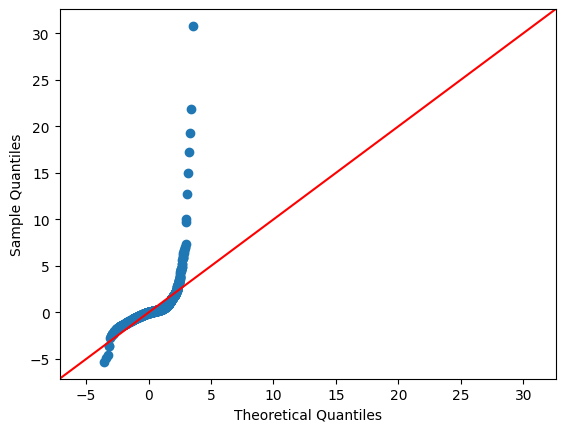

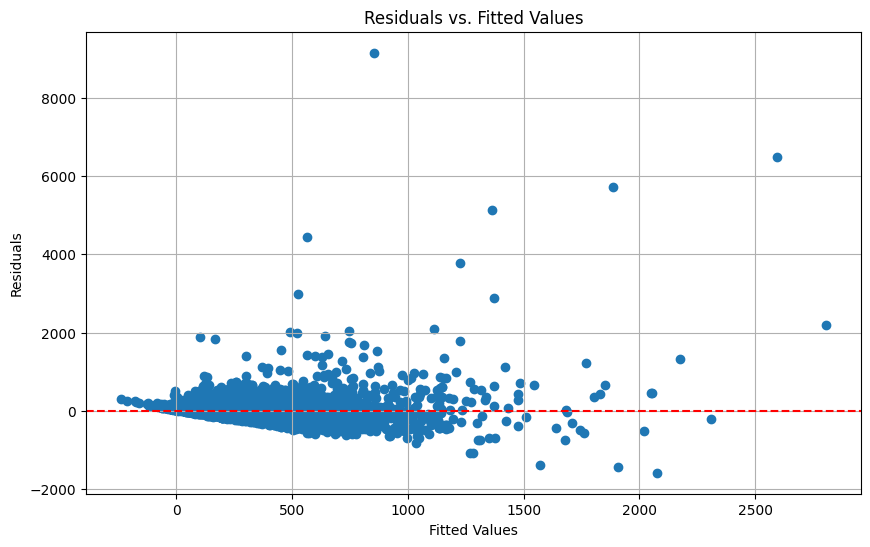

In [30]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

## Try a log transformation of the response variable (y)

In [31]:
# Check for zero or negative values in y
print(y[y <= 0]) # None

903   0.0000
Name: price, dtype: float64


In [32]:
# Fit stepwise regression
X = df[['bedrooms', 'bathrooms', 'host_response_rate', 'security_deposit', 'weekly_price', 'guests_included', 'room_type', 'review_scores_location', 'accommodates', 'availability_30', 'booked', 'cleaning_fee', 'host_identity_verified']]
X = sm.add_constant(X)

# Check for zero or negative values in y
if (y <= 0).any():
    # Add a small constant to avoid logarithm of zero
    y = y + 1e-6  # Adjust the constant based on your data

# Check for NaN values in y before transformation
if y.isna().any():
    # Handle NaN values in y (e.g., imputation)
    y = y.fillna(y.mean())  # Replace NaN values with mean (adjust based on your strategy)

# Log transformation
y_log = np.log(y)

# Fit regression
stepreg = sm.OLS(y_log, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     752.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:26:05   Log-Likelihood:                -5072.8
No. Observations:                5835   AIC:                         1.017e+04
Df Residuals:                    5821   BIC:                         1.027e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

### Examine the residuals from the transformed model to assess whether the log transformation helped to address the assumption violations

In [33]:
# Check for non-finite values
print(residuals[np.isnan(residuals) | np.isinf(residuals)])

Series([], dtype: float64)


In [34]:
# Handle the non-finite values
residuals = residuals[~np.isnan(residuals) & ~np.isinf(residuals)]
print(residuals)

0      -204.4569
1       -76.9280
2      -175.3538
3      -175.3538
4       157.6265
          ...   
5830     24.4466
5831     -6.1240
5832    -37.3486
5833    -61.5689
5834   -111.9782
Length: 5835, dtype: float64


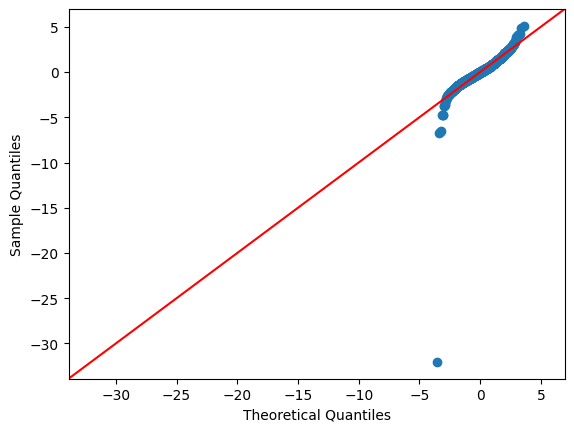

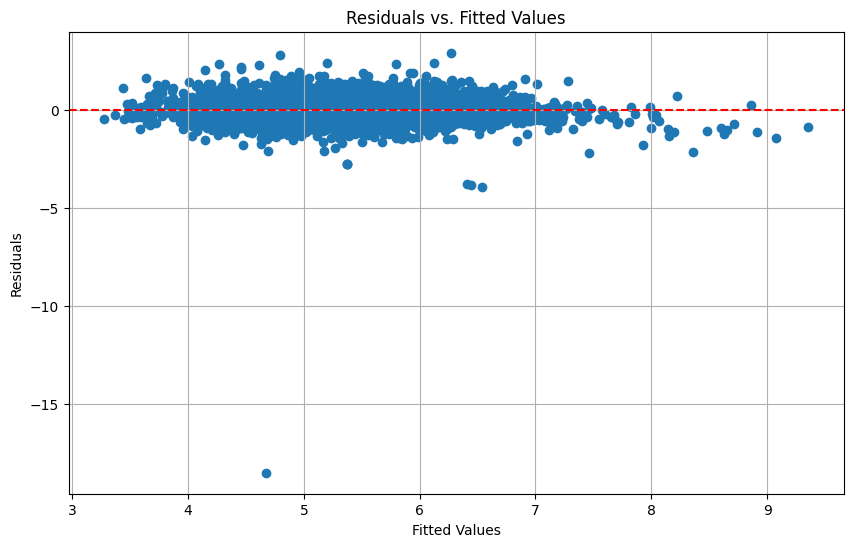

In [35]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

### Model has improved, and let's check for linear relationships
- See if the relationships between the numeric explanatory variables and the response are still linear after log transformation


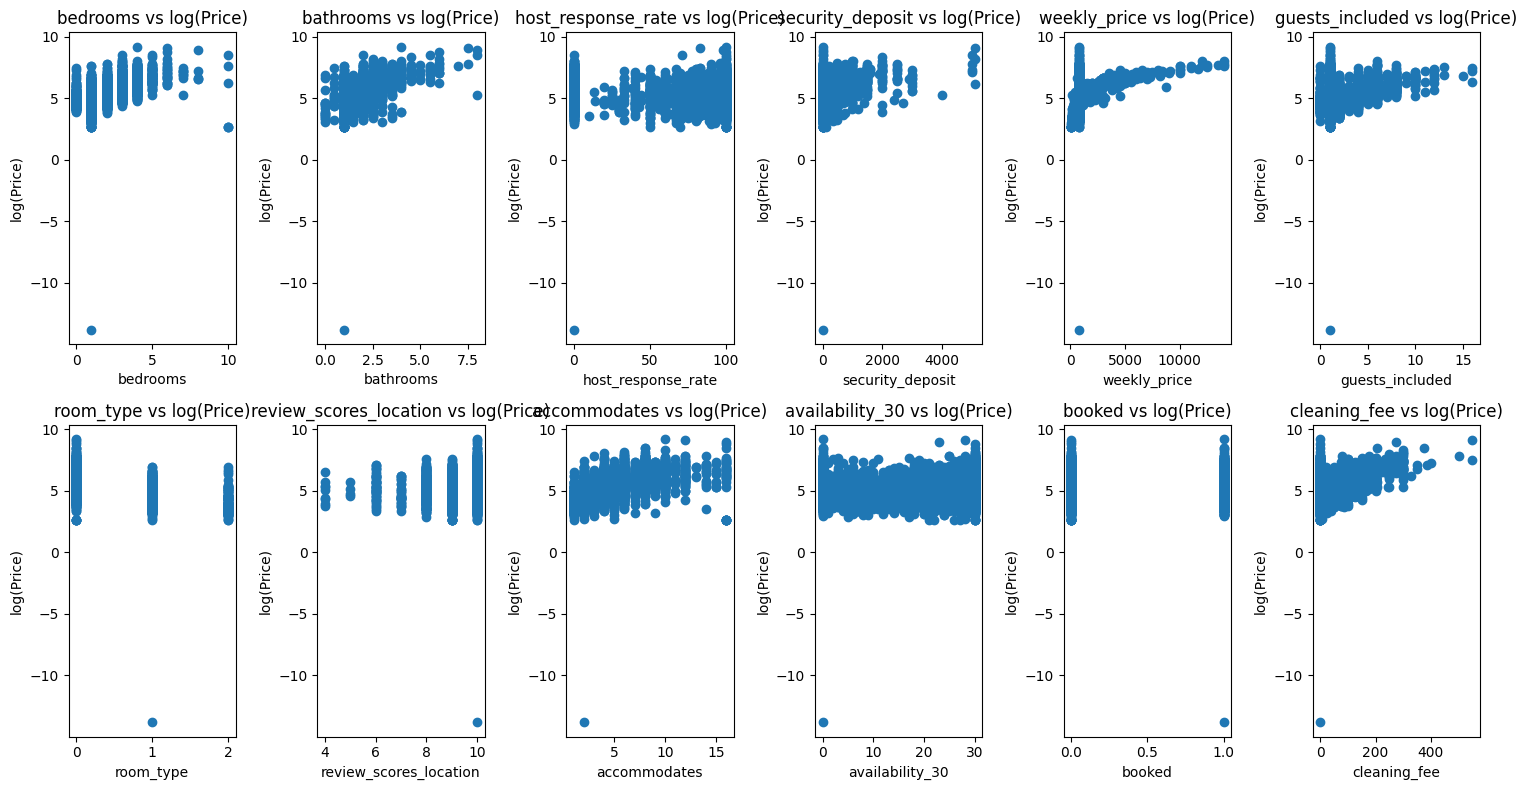

In [36]:
# List of column names in X
columns_to_plot = ['bedrooms', 'bathrooms', 'host_response_rate', 'security_deposit', 'weekly_price', 'guests_included', 'room_type',
                    'review_scores_location', 'accommodates', 'availability_30', 'booked', 'cleaning_fee']
# Log-transformed y
logy = np.log(y)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=len(columns_to_plot)//2, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and create scatter plots
for i, column in enumerate(columns_to_plot):
    x_column = df[[column]]

    # Scatter plot of x_column against logy
    axes[i].scatter(x_column, logy)

    # Add labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("log(Price)")
    axes[i].set_title(f"{column} vs log(Price)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Fit the Full Regression Model

In [37]:
# Fit full regression
X = df.drop(columns=['review_scores_rating'])
y = df['review_scores_rating']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.657
Model:                              OLS   Adj. R-squared:                  0.655
Method:                   Least Squares   F-statistic:                     347.7
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                          21:26:09   Log-Likelihood:                -15588.
No. Observations:                  5835   AIC:                         3.124e+04
Df Residuals:                      5802   BIC:                         3.146e+04
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

### Calculate Variance Inflation Factors (VIF) for full model to check for multicollinearity

In [38]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres) # Availability_30 and 60 are the most concerning variables  as they both have extremely high values under VIF

                       Variable       VIF
0                         const 1246.8740
1            host_response_time    1.1633
2            host_response_rate    1.5369
3             host_is_superhost    1.2823
4           host_listings_count    1.3395
5          host_has_profile_pic    1.0049
6        host_identity_verified    1.1597
7                     room_type    1.5365
8                  accommodates    4.5142
9                     bathrooms    2.8302
10                     bedrooms    4.2913
11                         beds    3.7453
12                     bed_type    1.0851
13                        price    1.8465
14                 weekly_price    1.2393
15             security_deposit    1.5847
16                 cleaning_fee    2.2537
17              guests_included    1.7580
18                 extra_people    1.3432
19               minimum_nights    1.0149
20              availability_30   14.5338
21              availability_60   24.1809
22             availability_365   

In [39]:
print(X.shape[1]) # 34 columns
print(X.shape[0]) # 5835 rows

33
5835


## Create function for automated Forward / Backward model selection

In [40]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


### Automated Variable Selection using function defined above

In [41]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  review_scores_checkin with p-value 0.0000
Add  review_scores_value with p-value 0.0000
Add  review_scores_cleanliness with p-value 0.0000
Add  review_scores_communication with p-value 0.0000
Add  review_scores_accuracy with p-value 0.0000
Add  review_scores_location with p-value 0.0000
Add  host_listings_count with p-value 0.0000
Add  const with p-value 0.0002
Add  bathrooms with p-value 0.0002
Add  host_response_rate with p-value 0.0035
resulting features:
['review_scores_checkin', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_location', 'host_listings_count', 'const', 'bathrooms', 'host_response_rate']


## Fit reduced model using variables identified by automated selection

In [42]:
# Fit stepwise regression
X = df[['review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_checkin',
        'review_scores_location', 'host_listings_count', 'bathrooms', 'host_response_rate']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.655
Model:                              OLS   Adj. R-squared:                  0.654
Method:                   Least Squares   F-statistic:                     1229.
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                          21:26:14   Log-Likelihood:                -15607.
No. Observations:                  5835   AIC:                         3.123e+04
Df Residuals:                      5825   BIC:                         3.130e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

### Check reduced model for multicollinearity

In [43]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep) # Constant is not much of a concern as it's just a number and not a variable. Multiccollinearity doesn't seem to be an issue here at all with the step-wise function

                      Variable      VIF
0                        const 652.8506
1          review_scores_value   2.0670
2    review_scores_cleanliness   1.8882
3  review_scores_communication   1.9402
4       review_scores_accuracy   2.0207
5        review_scores_checkin   1.8932
6       review_scores_location   1.4144
7          host_listings_count   1.0878
8                    bathrooms   1.0355
9           host_response_rate   1.0419


### Examine residual plots to check for

1. Constant variance
2. Independence
3. Normality

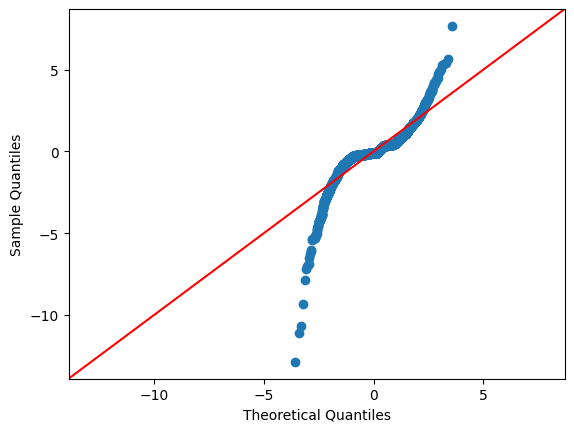

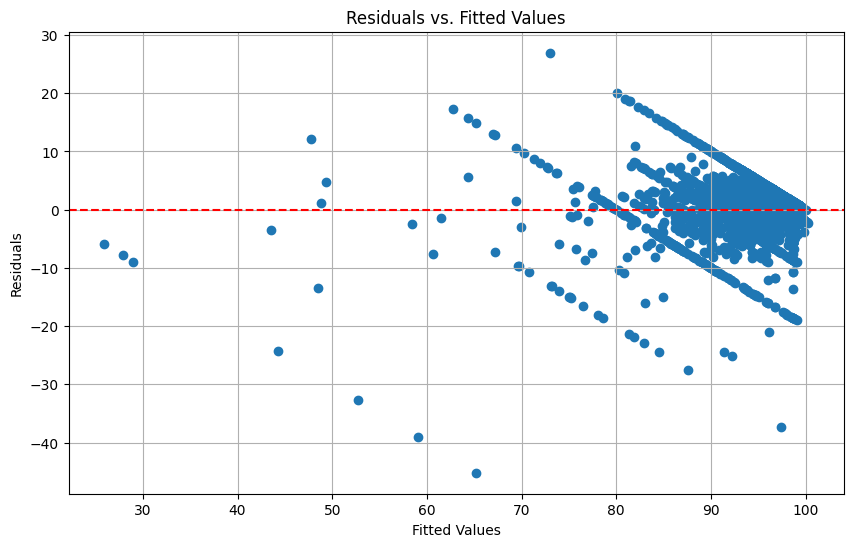

In [44]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

## Try a log transformation of the response variable (y)

In [45]:
# Fit stepwise regression
X = df[['review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_checkin',
        'review_scores_location', 'host_listings_count', 'bathrooms', 'host_response_rate']]

# Log transformation
y_log = np.log(y)

# Fit regression
stepreg = sm.OLS(y_log, X).fit()

# Display regression summary
print(stepreg.summary())


                                  OLS Regression Results                                 
Dep. Variable:     review_scores_rating   R-squared (uncentered):                   0.999
Model:                              OLS   Adj. R-squared (uncentered):              0.999
Method:                   Least Squares   F-statistic:                          7.208e+05
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                          21:26:15   Log-Likelihood:                          3329.0
No. Observations:                  5835   AIC:                                     -6640.
Df Residuals:                      5826   BIC:                                     -6580.
Df Model:                             9                                                  
Covariance Type:              nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

### Examine the residuals from the transformed model to assess whether the log transformation helped to address the assumption violations

In [46]:
# Check for non-finite values
print(residuals[np.isnan(residuals) | np.isinf(residuals)])

Series([], dtype: float64)


In [47]:
# Handle the non-finite values
residuals = residuals[~np.isnan(residuals) & ~np.isinf(residuals)]
print(residuals)

0       1.2743
1      -0.1546
2      -0.4927
3      -0.4927
4       0.4446
         ...  
5830    3.3396
5831   -0.6834
5832    8.0919
5833   -0.4821
5834   -0.3830
Length: 5835, dtype: float64


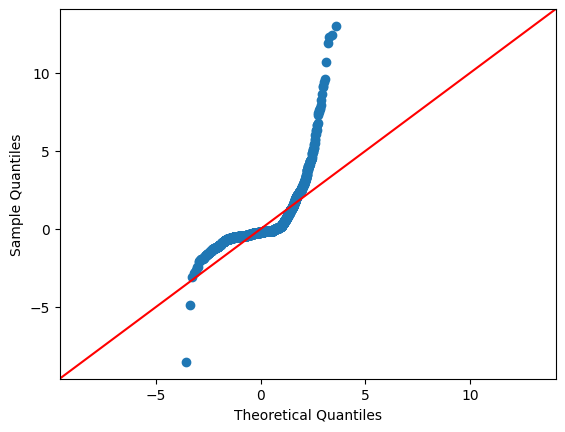

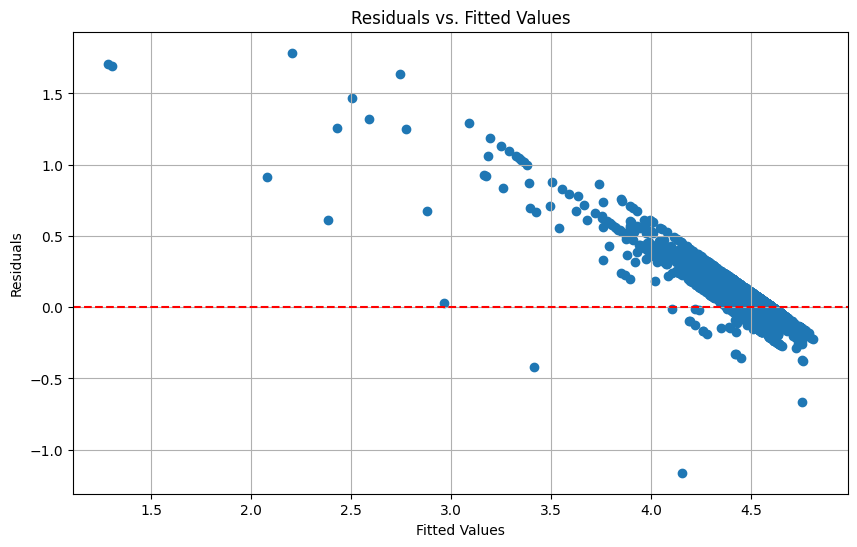

In [48]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

### Model has not improved, and it's clear there are violations of linearity.

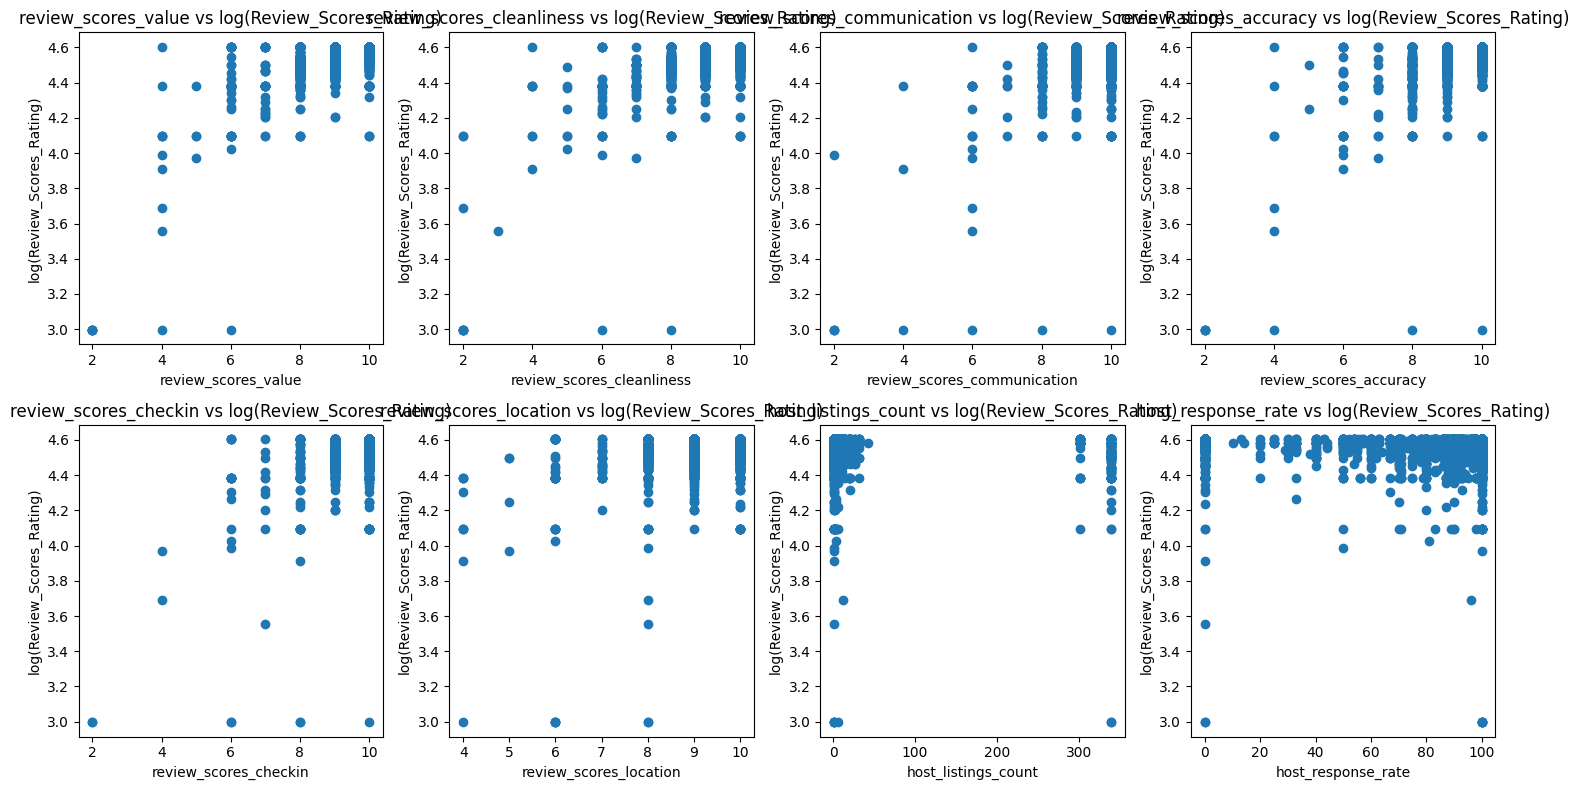

In [49]:
# List of column names in X
columns_to_plot = ['review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_accuracy',
                    'review_scores_checkin', 'review_scores_location', 'host_listings_count', 'host_response_rate']
# Log-transformed y
logy = np.log(y)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=len(columns_to_plot)//2, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over columns and create scatter plots
for i, column in enumerate(columns_to_plot):
    x_column = df[[column]]

    # Scatter plot of x_column against logy
    axes[i].scatter(x_column, logy)

    # Add labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("log(Review_Scores_Rating)")
    axes[i].set_title(f"{column} vs log(Review_Scores_Rating)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# L1 Regularization (LASSO), L2 Regularization Ridge Regression, Elastic Net
**SHINKAGE**
- (L1) Can shrink coefficients to zero so can be used for feature selection
- (L1) Reduces overfitting by eliminating features
- (L2) Does not shrink coefficients all the way to 0
- (L2) Reduces impact of features that are not important predictors
- Elastic Net (hybrid) Combines feature elimination and feature reduction to improve model’s predictions


## Splitting the Data (Training and Testing)

In [50]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           5835 non-null   int64  
 1   host_response_rate           5835 non-null   int64  
 2   host_is_superhost            5835 non-null   int64  
 3   host_listings_count          5835 non-null   float64
 4   host_has_profile_pic         5835 non-null   int64  
 5   host_identity_verified       5835 non-null   int64  
 6   room_type                    5835 non-null   int64  
 7   accommodates                 5835 non-null   int64  
 8   bathrooms                    5835 non-null   float64
 9   bedrooms                     5835 non-null   float64
 10  beds                         5835 non-null   float64
 11  bed_type                     5835 non-null   int64  
 12  price                        5835 non-null   float64
 13  weekly_price      

In [51]:
# split the data into training and testing sets
X2 = df_dt.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X2=df_dt[['host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'weekly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'availability_30', 'availability_60',
       'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy']]

y2 = df_dt['booked']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           4084 non-null   int64  
 1   host_response_rate           4084 non-null   int64  
 2   host_is_superhost            4084 non-null   int64  
 3   host_listings_count          4084 non-null   float64
 4   host_has_profile_pic         4084 non-null   int64  
 5   host_identity_verified       4084 non-null   int64  
 6   room_type                    4084 non-null   int64  
 7   accommodates                 4084 non-null   int64  
 8   bathrooms                    4084 non-null   float64
 9   bedrooms                     4084 non-null   float64
 10  beds                         4084 non-null   float64
 11  bed_type                     4084 non-null   int64  
 12  price                        4084 non-null   float64
 13  weekly_price    

## Fit Logistic Regression Models using L1, L2, and Elastic Net

In [52]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X2_train, y2_train)
lr_l1_01.fit(X2_train, y2_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X2_train, y2_train)
lr_l12.fit(X2_train, y2_train)




LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [53]:
# function for model coefficents
def rpt_model_variables(model, features):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X2.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1, X2)
df_coefficients01 = rpt_model_variables(lr_l1_01, X2)
df_coefficients2 = rpt_model_variables(lr_l2, X2)
df_coefficients12 = rpt_model_variables(lr_l12, X2)

                        feature  coefficient  abs_coefficient
20              availability_60      -0.2287           0.2287
24       review_scores_accuracy       0.2045           0.2045
28       review_scores_location       0.1446           0.1446
26        review_scores_checkin       0.1035           0.1035
7                  accommodates       0.0995           0.0995
27  review_scores_communication       0.0883           0.0883
19              availability_30       0.0652           0.0652
31          cancellation_policy       0.0488           0.0488
16              guests_included      -0.0480           0.0480
25    review_scores_cleanliness       0.0337           0.0337
18               minimum_nights       0.0162           0.0162
21             availability_365      -0.0087           0.0087
1            host_response_rate      -0.0067           0.0067
22            number_of_reviews      -0.0064           0.0064
23         review_scores_rating       0.0051           0.0051
3       

## Variable Importance

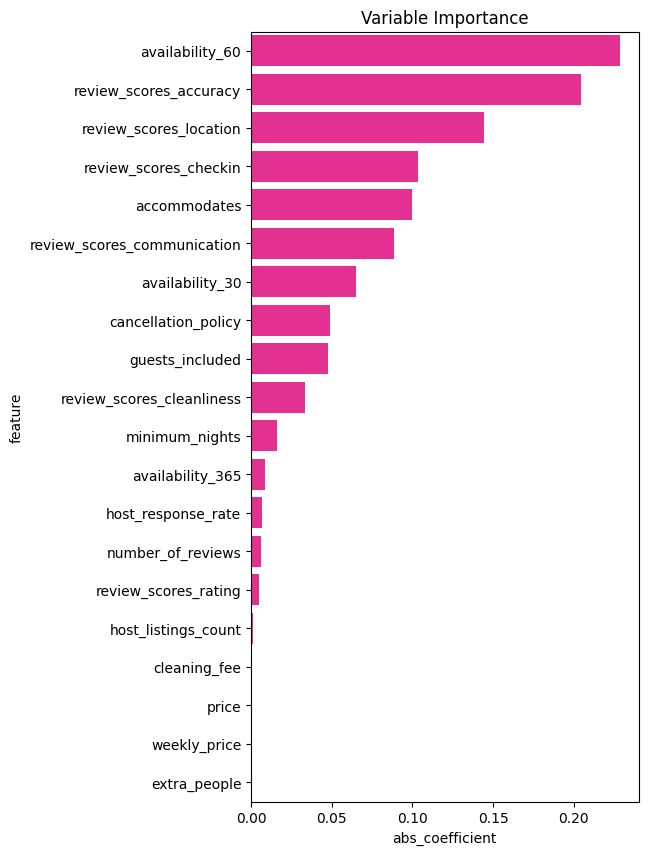

-- rejected --
 bedrooms
 instant_bookable
 review_scores_value
 host_is_superhost
 host_has_profile_pic
 room_type
 host_identity_verified
 beds
 bathrooms
 security_deposit
 bed_type
 host_response_time


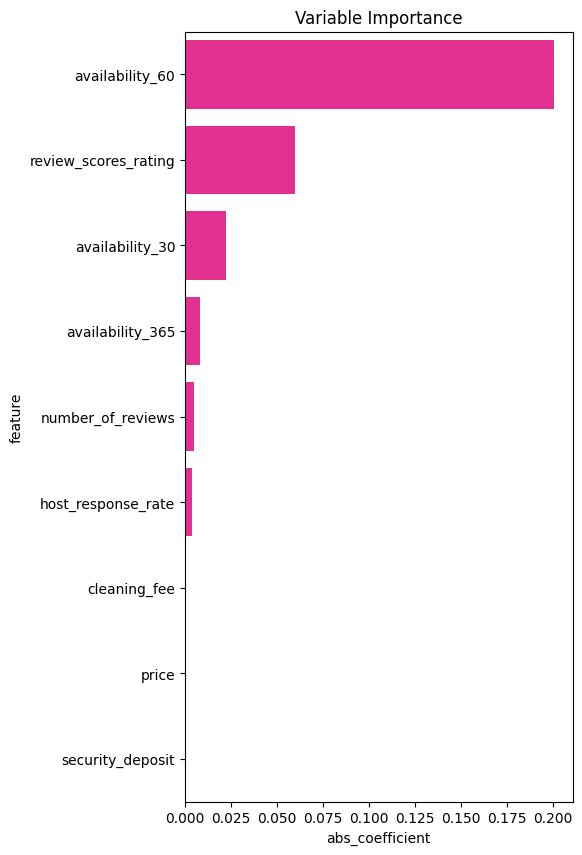

-- rejected --
 review_scores_value
 review_scores_location
 review_scores_communication
 review_scores_checkin
 review_scores_cleanliness
 review_scores_accuracy
 minimum_nights
 instant_bookable
 host_response_time
 guests_included
 extra_people
 weekly_price
 bed_type
 beds
 bedrooms
 bathrooms
 accommodates
 room_type
 host_identity_verified
 host_has_profile_pic
 host_listings_count
 host_is_superhost
 cancellation_policy


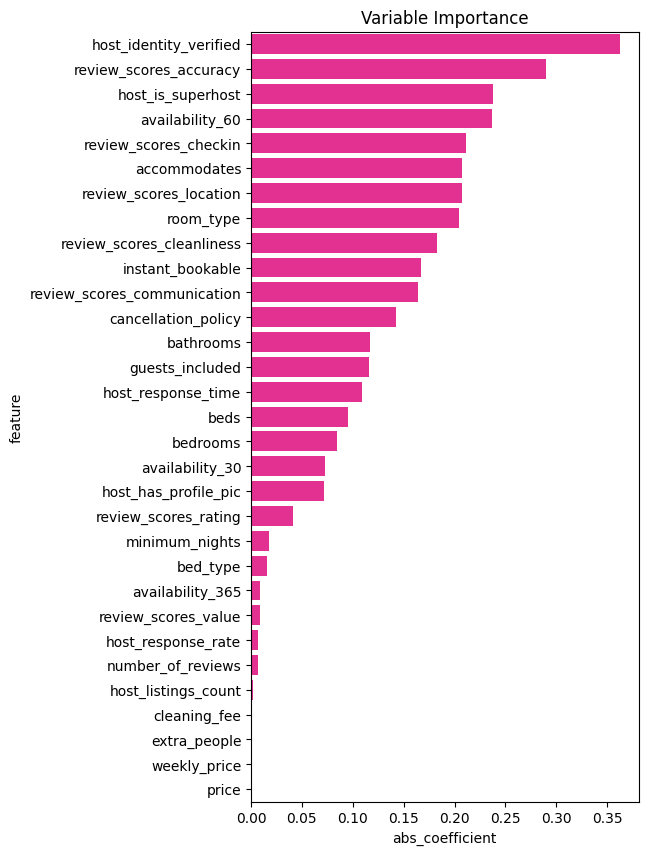

-- rejected --
 security_deposit


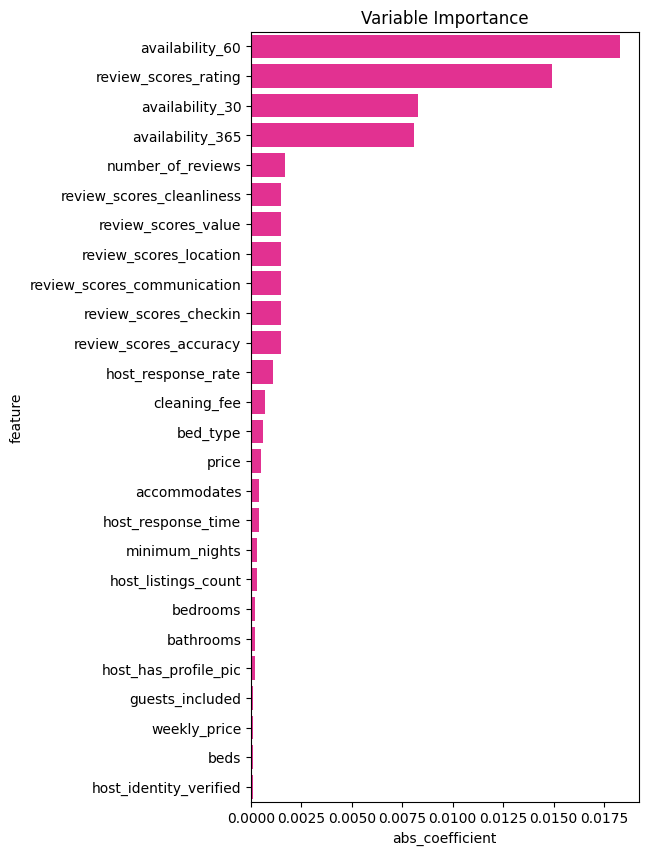

-- rejected --
 extra_people
 security_deposit
 room_type
 host_is_superhost
 instant_bookable
 cancellation_policy


In [54]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="deeppink")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

## Make Predictions for each model

In [55]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X2_train)
y_pred_test = lr_l1_1.predict(X2_test)
y_proba_train = lr_l1_1.predict_proba(X2_train)
y_proba_test = lr_l1_1.predict_proba(X2_test)

y_pred_train1 = lr_l1_01.predict(X2_train)
y_pred_test1 = lr_l1_01.predict(X2_test)
y_proba_train1 = lr_l1_01.predict_proba(X2_train)
y_proba_test1 = lr_l1_01.predict_proba(X2_test)

y_pred_train2 = lr_l2.predict(X2_train)
y_pred_test2 = lr_l2.predict(X2_test)
y_proba_train2 = lr_l2.predict_proba(X2_train)
y_proba_test2 = lr_l2.predict_proba(X2_test)

y_pred_train12 = lr_l12.predict(X2_train)
y_pred_test12 = lr_l12.predict(X2_test)
y_proba_train12 = lr_l12.predict_proba(X2_train)
y_proba_test12 = lr_l12.predict_proba(X2_test)

In [56]:
# Define a function to print confusion matrix
def print_confusion_matrix(model_name, y_true, y_pred):
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_true, y_pred))
    print()

# Confusion matrices for lr_l1_1
print_confusion_matrix("lr_l1_1 - Training", y2_train, y_pred_train)
print_confusion_matrix("lr_l1_1 - Testing", y2_test, y_pred_test)

# Confusion matrices for lr_l1_01
print_confusion_matrix("lr_l1_01 - Training", y2_train, y_pred_train1)
print_confusion_matrix("lr_l1_01 - Testing", y2_test, y_pred_test1)

# Confusion matrices for lr_l2
print_confusion_matrix("lr_l2 - Training", y2_train, y_pred_train2)
print_confusion_matrix("lr_l2 - Testing", y2_test, y_pred_test2)

# Confusion matrices for lr_l12
print_confusion_matrix("lr_l12 - Training", y2_train, y_pred_train12)
print_confusion_matrix("lr_l12 - Testing", y2_test, y_pred_test12)

Confusion Matrix for lr_l1_1 - Training:
[[2757   82]
 [  76 1169]]

Confusion Matrix for lr_l1_1 - Testing:
[[1169   30]
 [  35  517]]

Confusion Matrix for lr_l1_01 - Training:
[[2758   81]
 [  78 1167]]

Confusion Matrix for lr_l1_01 - Testing:
[[1168   31]
 [  34  518]]

Confusion Matrix for lr_l2 - Training:
[[2760   79]
 [  76 1169]]

Confusion Matrix for lr_l2 - Testing:
[[1168   31]
 [  40  512]]

Confusion Matrix for lr_l12 - Training:
[[2732  107]
 [ 467  778]]

Confusion Matrix for lr_l12 - Testing:
[[1160   39]
 [ 213  339]]



## Calculate Accuracy, Precision, Recall for each model on training and test set

### With L = 0.1

In [57]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y2_train, y_pred_train)
prec3_train = precision_score(y2_train, y_pred_train)
rec3_train = recall_score(y2_train, y_pred_train)
auc3_train = roc_auc_score(y2_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y2_test, y_pred_test)
prec3_test = precision_score(y2_test, y_pred_test)
rec3_test = recall_score(y2_test, y_pred_test)
auc3_test = roc_auc_score(y2_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.9613
Precision: 0.9345
Recall.  : 0.9390
AUC      : 0.9944

 -- test set -- 
Accuracy : 0.9629
Precision: 0.9452
Recall.  : 0.9366
AUC      : 0.9954


### L = 0.01

In [58]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y2_train, y_pred_train1)
prec3_train1 = precision_score(y2_train, y_pred_train1)
rec3_train1 = recall_score(y2_train, y_pred_train1)
auc3_train1 = roc_auc_score(y2_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y2_test, y_pred_test1)
prec3_test1 = precision_score(y2_test, y_pred_test1)
rec3_test1 = recall_score(y2_test, y_pred_test1)
auc3_test1 = roc_auc_score(y2_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.9611
Precision: 0.9351
Recall.  : 0.9373
AUC      : 0.9939

 -- test set -- 
Accuracy : 0.9629
Precision: 0.9435
Recall.  : 0.9384
AUC      : 0.9951


### L2 Regularization

In [59]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y2_train, y_pred_train2)
prec3_train2 = precision_score(y2_train, y_pred_train2)
rec3_train2 = recall_score(y2_train, y_pred_train2)
auc3_train2 = roc_auc_score(y2_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y2_test, y_pred_test2)
prec3_test2 = precision_score(y2_test, y_pred_test2)
rec3_test2 = recall_score(y2_test, y_pred_test2)
auc3_test2 = roc_auc_score(y2_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.9620
Precision: 0.9367
Recall.  : 0.9390
AUC      : 0.9947

 -- test set -- 
Accuracy : 0.9595
Precision: 0.9429
Recall.  : 0.9275
AUC      : 0.9955


### Elastic Net

In [60]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y2_train, y_pred_train12)
prec3_train12 = precision_score(y2_train, y_pred_train12)
rec3_train12 = recall_score(y2_train, y_pred_train12)
auc3_train12 = roc_auc_score(y2_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y2_test, y_pred_test12)
prec3_test12 = precision_score(y2_test, y_pred_test12)
rec3_test12 = recall_score(y2_test, y_pred_test12)
auc3_test12 = roc_auc_score(y2_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.8595
Precision: 0.8791
Recall.  : 0.6249
AUC      : 0.9609

 -- test set -- 
Accuracy : 0.8561
Precision: 0.8968
Recall.  : 0.6141
AUC      : 0.9655


## ROC Curve for each of the models

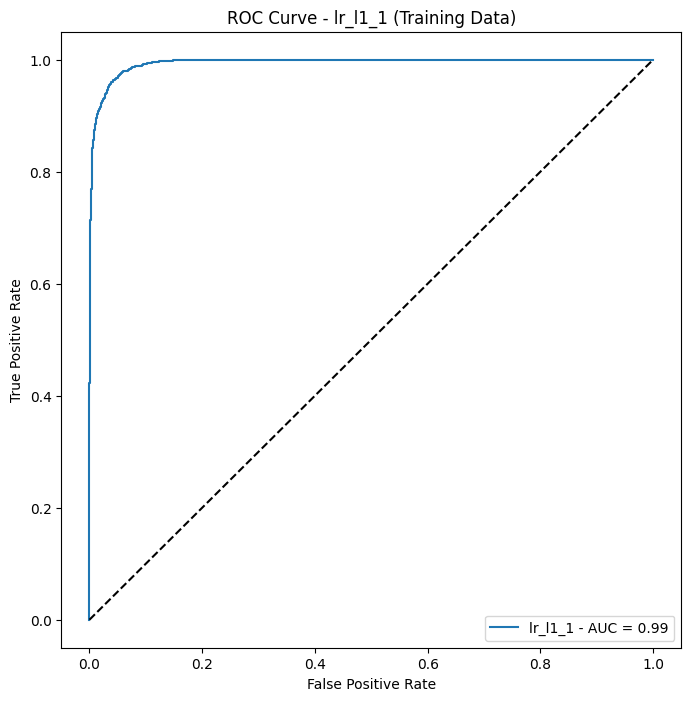

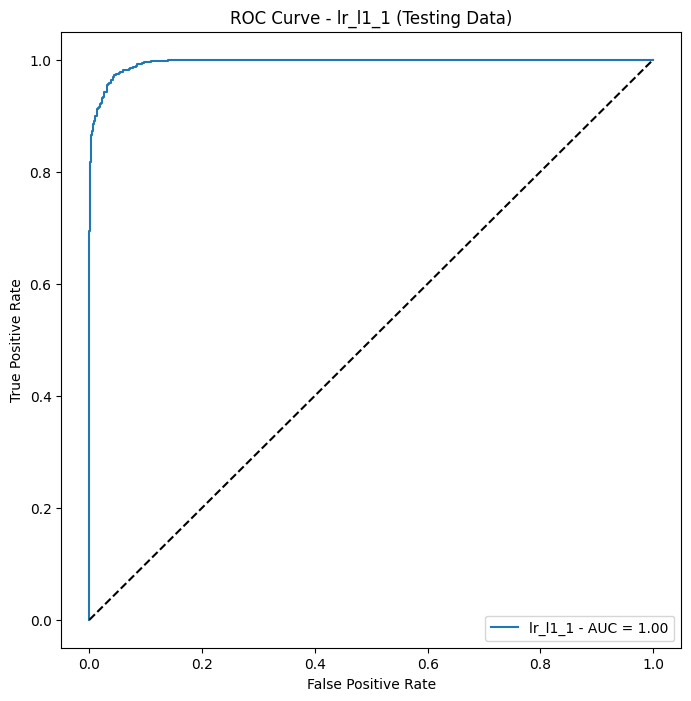

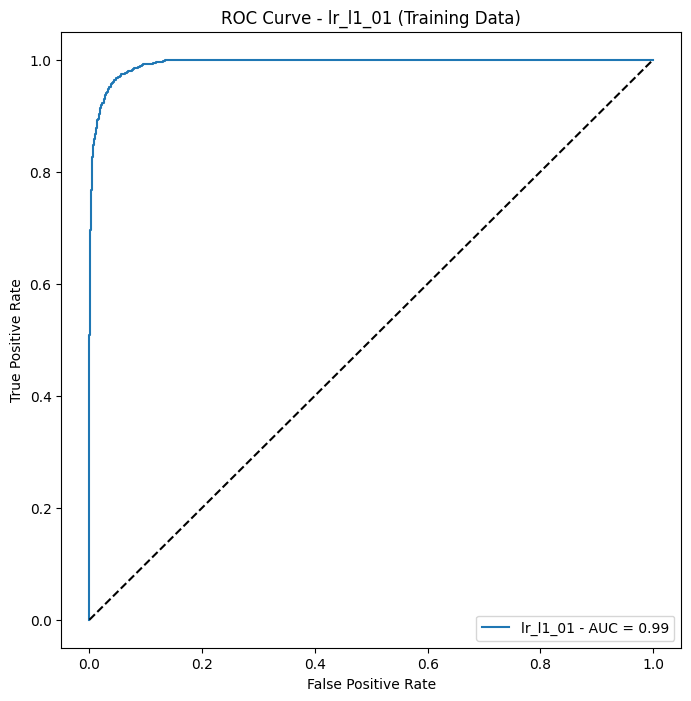

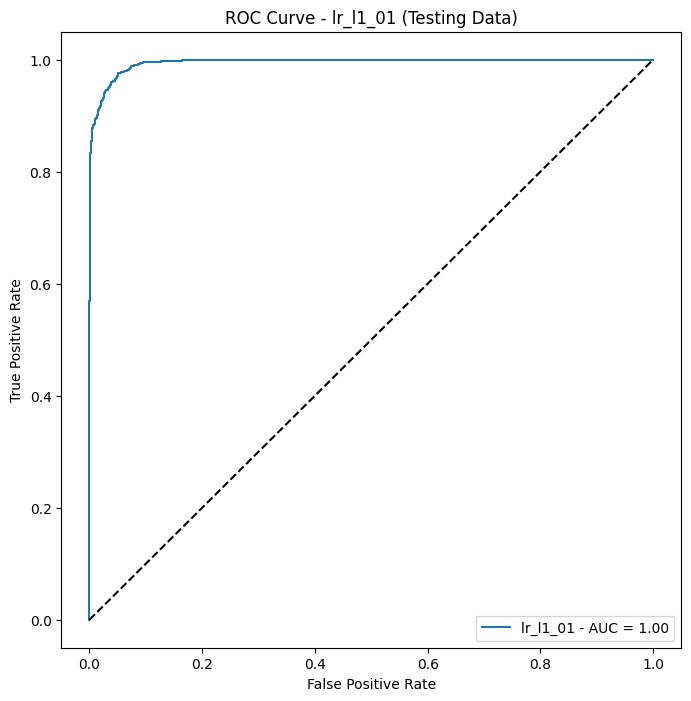

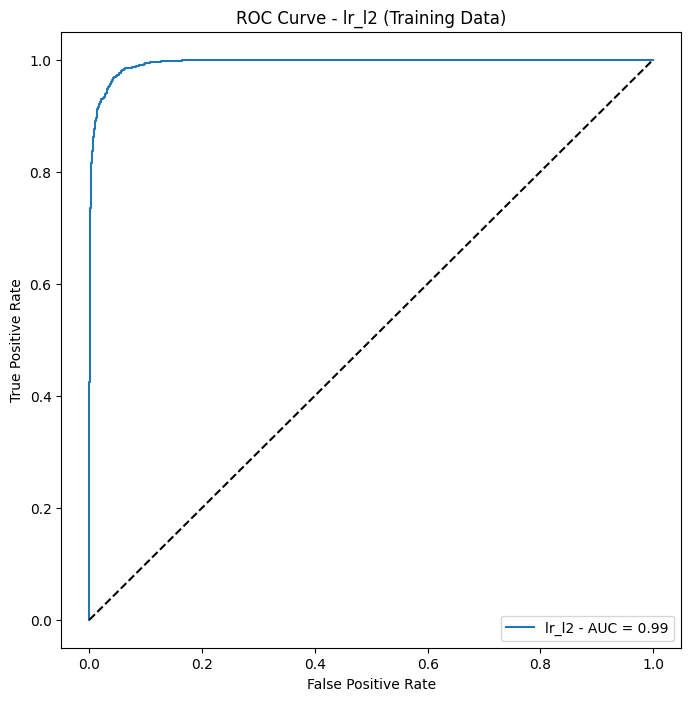

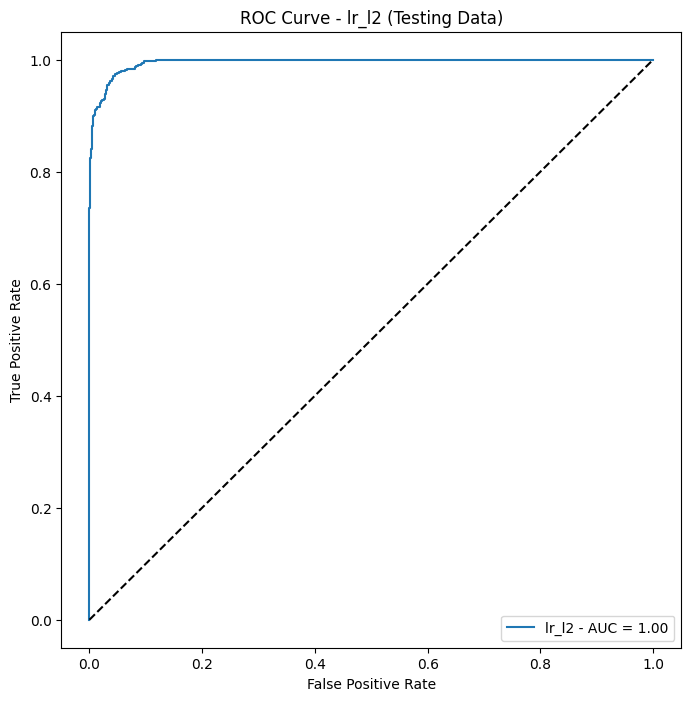

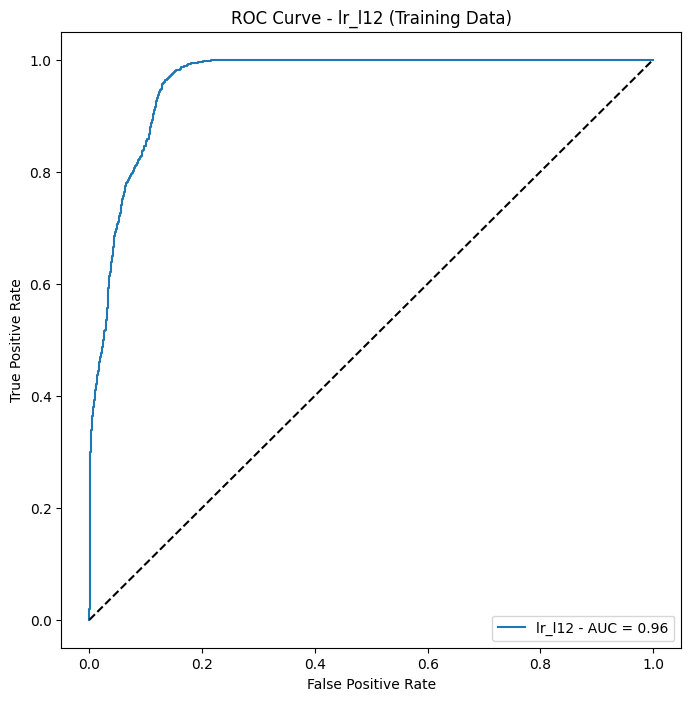

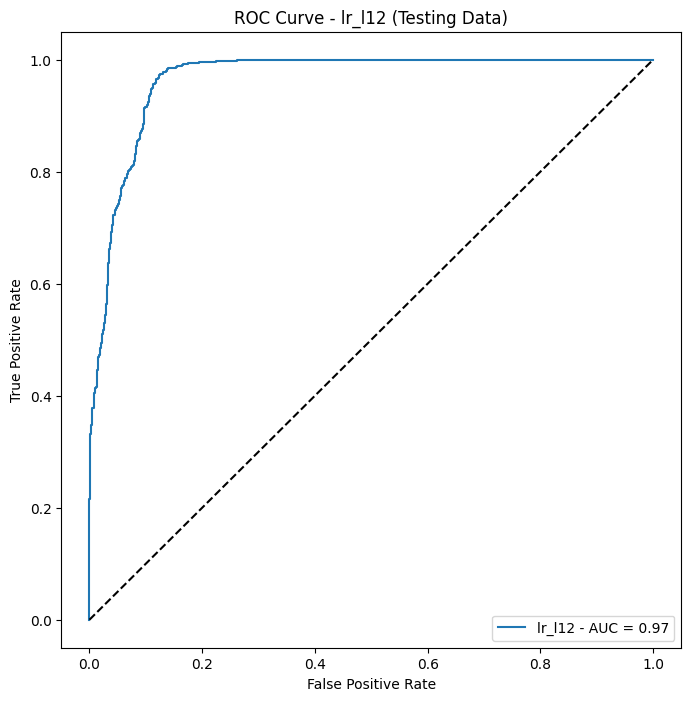

In [61]:
# Define a function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_probs, dataset_type):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    auc = roc_auc_score(y_true, y_probs[:, 1])

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} ({dataset_type} Data)')
    plt.legend()
    plt.show()

# Plot ROC curves for lr_l1_1
plot_roc_curve("lr_l1_1", y2_train, y_proba_train, "Training")
plot_roc_curve("lr_l1_1", y2_test, y_proba_test, "Testing")

# Plot ROC curves for lr_l1_01
plot_roc_curve("lr_l1_01", y2_train, y_proba_train1, "Training")
plot_roc_curve("lr_l1_01", y2_test, y_proba_test1, "Testing")

# Plot ROC curves for lr_l2
plot_roc_curve("lr_l2", y2_train, y_proba_train2, "Training")
plot_roc_curve("lr_l2", y2_test, y_proba_test2, "Testing")

# Plot ROC curves for lr_l12
plot_roc_curve("lr_l12", y2_train, y_proba_train12, "Training")
plot_roc_curve("lr_l12", y2_test, y_proba_test12, "Testing")

# Building Classification Tree Models

---

- Determining Booking Probabilities: By using decision trees and tuning the decision tree, we can return probabilities and give outcomes for booking probabilities. This will be very insightful and give us a much better understanding of how properties are booked.


We will use 3 parameters to control the growth of the tree

max_depth determines the maximum number of levels for the tree. Smaller values help to prevent overfitting. Default value = None

min_samples_leaf determines the minimum number of observations that must remain in a leaf. If a split leaves fewer than this number of observations, the split cannot be performed. Larger values help to prevent overfitting. Default value = 1.

ccp_alpha is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting. Default value = 0. Larger values yield a smaller tree.

## Training and Testing Data

In [62]:
df_dt['booked'] = df_dt['booked'].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_response_time           5835 non-null   int64   
 1   host_response_rate           5835 non-null   int64   
 2   host_is_superhost            5835 non-null   int64   
 3   host_listings_count          5835 non-null   float64 
 4   host_has_profile_pic         5835 non-null   int64   
 5   host_identity_verified       5835 non-null   int64   
 6   room_type                    5835 non-null   int64   
 7   accommodates                 5835 non-null   int64   
 8   bathrooms                    5835 non-null   float64 
 9   bedrooms                     5835 non-null   float64 
 10  beds                         5835 non-null   float64 
 11  bed_type                     5835 non-null   int64   
 12  price                        5835 non-null   float64 
 13  wee

In [63]:
df_dt.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'booked'],
      dtype='object')

In [64]:
# split the data into training and testing sets
X3 = df_dt.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X3 = df_dt[['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy']]

# [['review_scores_checkin', 'availability_30', 'review_scores_communication', 'review_scores_rating', 'extra_people']]
# Lasso C = 0.1
# X3 = df_dt[['review_scores_rating', 'availability_30', 'extra_people']]
# Elastic Net Hybrid
## X3 = df_dt[['review_scores_checkin', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_location',
## 'bed_type', 'host_response_time', 'room_type', 'review_scores_cleanliness', 'guests_included', 'availability_30']]

y3 = df_dt['booked']
# Test and Train variables
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()
y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           4084 non-null   int64  
 1   host_response_rate           4084 non-null   int64  
 2   host_is_superhost            4084 non-null   int64  
 3   host_listings_count          4084 non-null   float64
 4   host_has_profile_pic         4084 non-null   int64  
 5   host_identity_verified       4084 non-null   int64  
 6   room_type                    4084 non-null   int64  
 7   accommodates                 4084 non-null   int64  
 8   bathrooms                    4084 non-null   float64
 9   bedrooms                     4084 non-null   float64
 10  beds                         4084 non-null   float64
 11  bed_type                     4084 non-null   int64  
 12  price                        4084 non-null   float64
 13  weekly_price    

## Create the Decision Tree

In [65]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=100, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X3_train, y3_train)

# this code can be used to produce a textual representation of the tree if desired
# text_rep = tree.export_text(dt)
# print(text_rep)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=100)

## Visualize the tree

In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X3.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

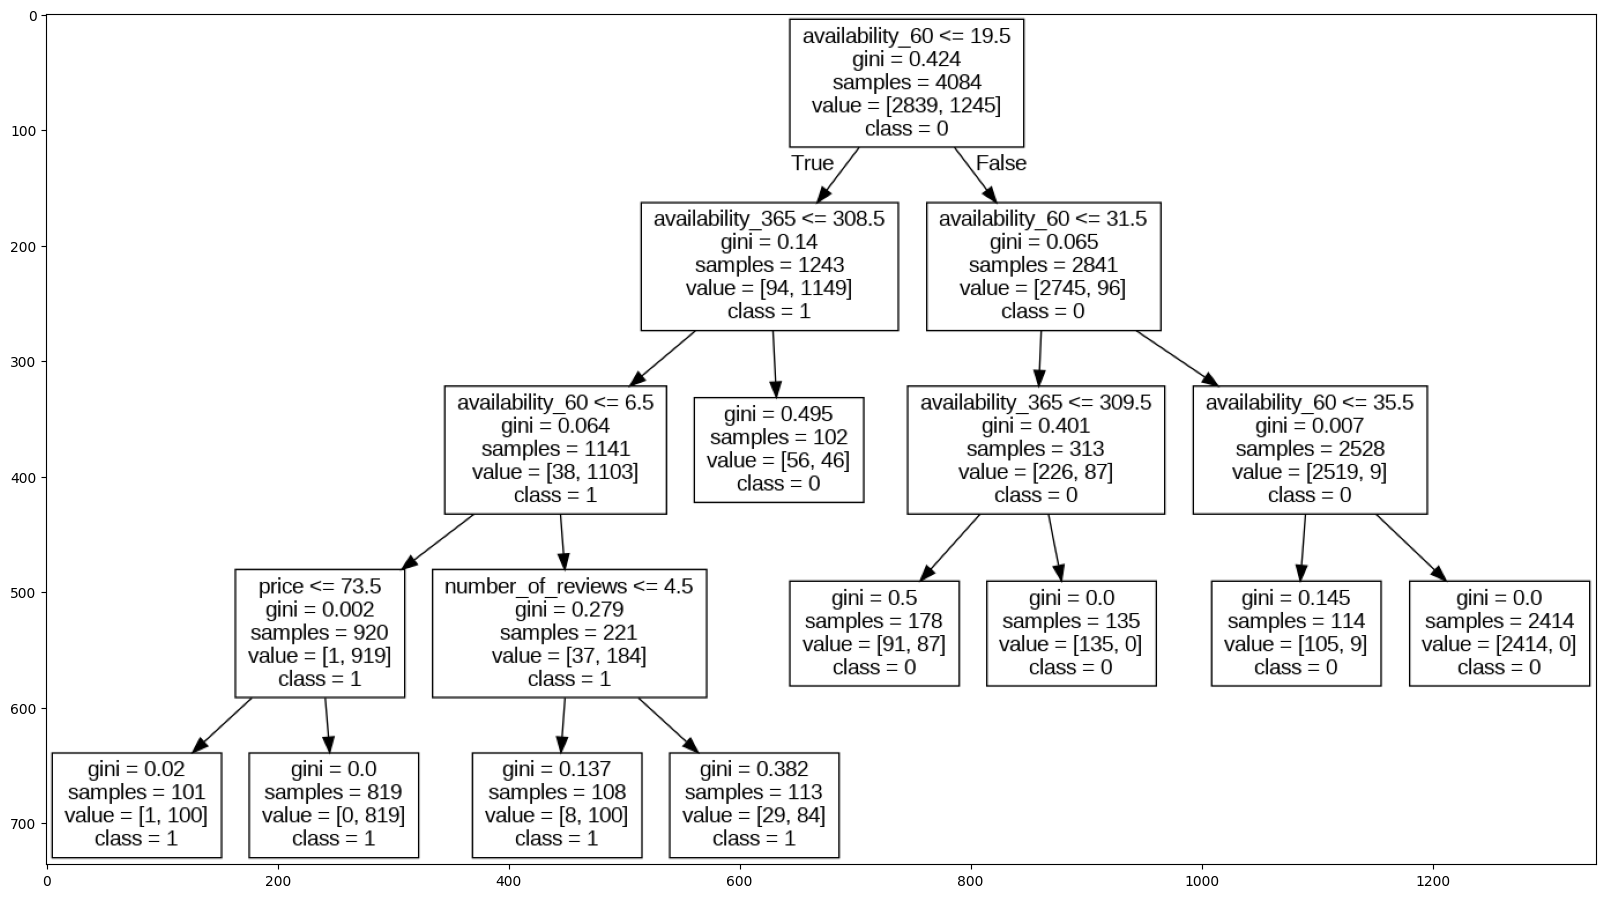

In [67]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X3.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

## Make Predictions on training and test data

In [68]:
# make predictions on the training and test data
y_pred_train = dt.predict(X3_train)
y_pred_test = dt.predict(X3_test)

y_prob_train = dt.predict_proba(X3_train)
y_prob_test = dt.predict_proba(X3_test)

## Assess Model on training and test data

In [69]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y3_train, y_pred_train)
prec_train = precision_score(y3_train, y_pred_train)
rec_train = recall_score(y3_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y3_test, y_pred_test)
prec_test = precision_score(y3_test, y_pred_test)
rec_test = recall_score(y3_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9559
Precision: 0.9667
Recall.  : 0.8859

 -- test set -- 
Accuracy : 0.9589
Precision: 0.9743
Recall.  : 0.8931


## Generate a confusion matrix for the training and test data

In [70]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y3_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y3_test)
print(conf_matrix)

[[2801  142]
 [  38 1103]]
[[1186   59]
 [  13  493]]


## ROC Curve for training data

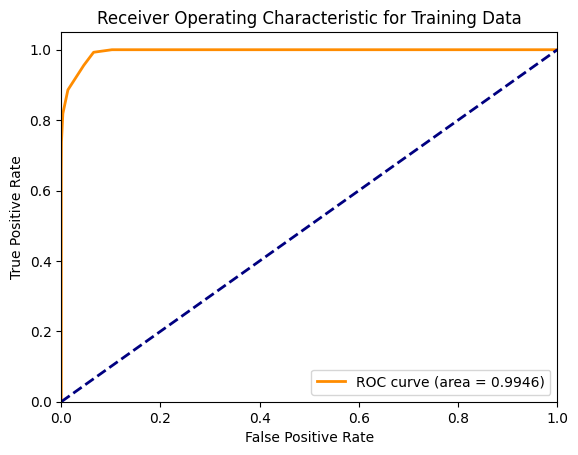

In [71]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y3_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y3_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

## ROC curve for test data

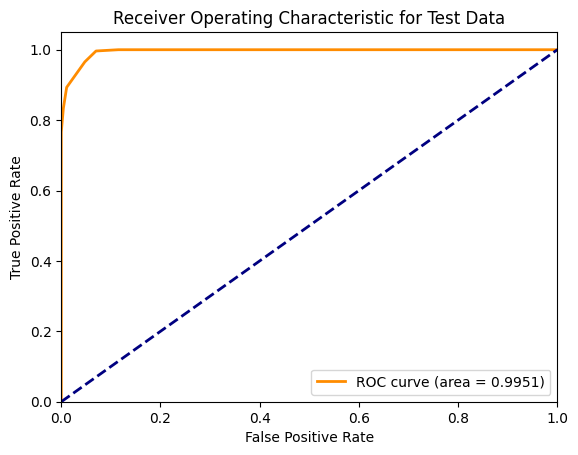

In [72]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y3_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y3_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

## Print feature importance of the tree

    importance                      feature
20      0.9405              availability_60
21      0.0571             availability_365
22      0.0024            number_of_reviews
12      0.0000                        price
0       0.0000           host_response_time
17      0.0000                 extra_people
30      0.0000             instant_bookable
29      0.0000          review_scores_value
28      0.0000       review_scores_location
27      0.0000  review_scores_communication
26      0.0000        review_scores_checkin
25      0.0000    review_scores_cleanliness
24      0.0000       review_scores_accuracy
23      0.0000         review_scores_rating
19      0.0000              availability_30
18      0.0000               minimum_nights
16      0.0000              guests_included
1       0.0000           host_response_rate
15      0.0000                 cleaning_fee
14      0.0000             security_deposit
13      0.0000                 weekly_price
11      0.0000                  

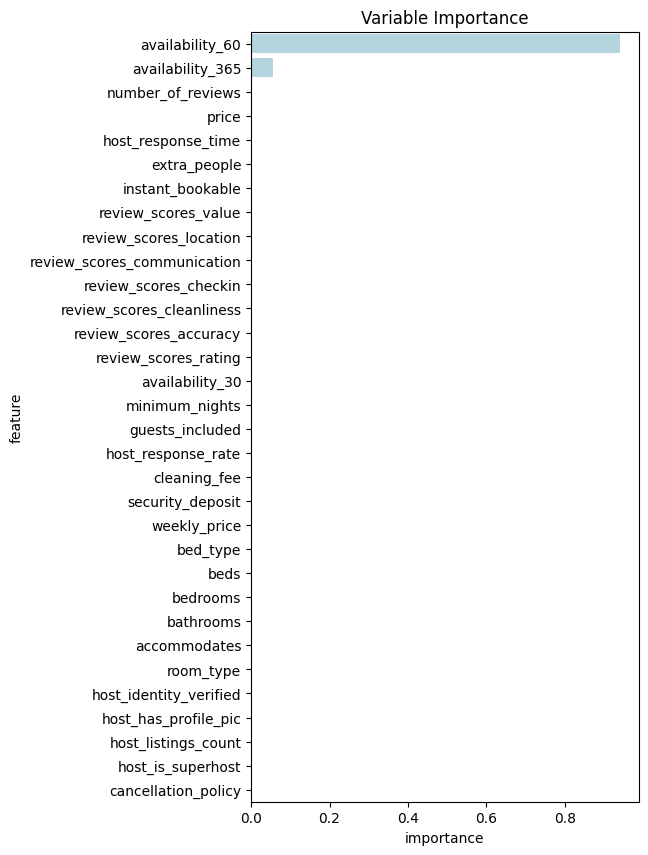

In [73]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df_feature_importance = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df_feature_importance['feature']=X3.columns

#sort data so features with largest importance values are at the top
df2 = df_feature_importance.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Tune Parameters of classification Tree

In [74]:
from sklearn.model_selection import GridSearchCV

## Run the tuned tree

In [75]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X3_train, y3_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)

{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 10}


In [99]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = None, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X3_train, y3_train)

# this code can be used to produce a textual representation of the tree if desired
# text_rep = tree.export_text(dt)
# print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, min_samples_leaf=10)

## Run the tuned tree

In [100]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X3.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

## Visualize the tuned tree

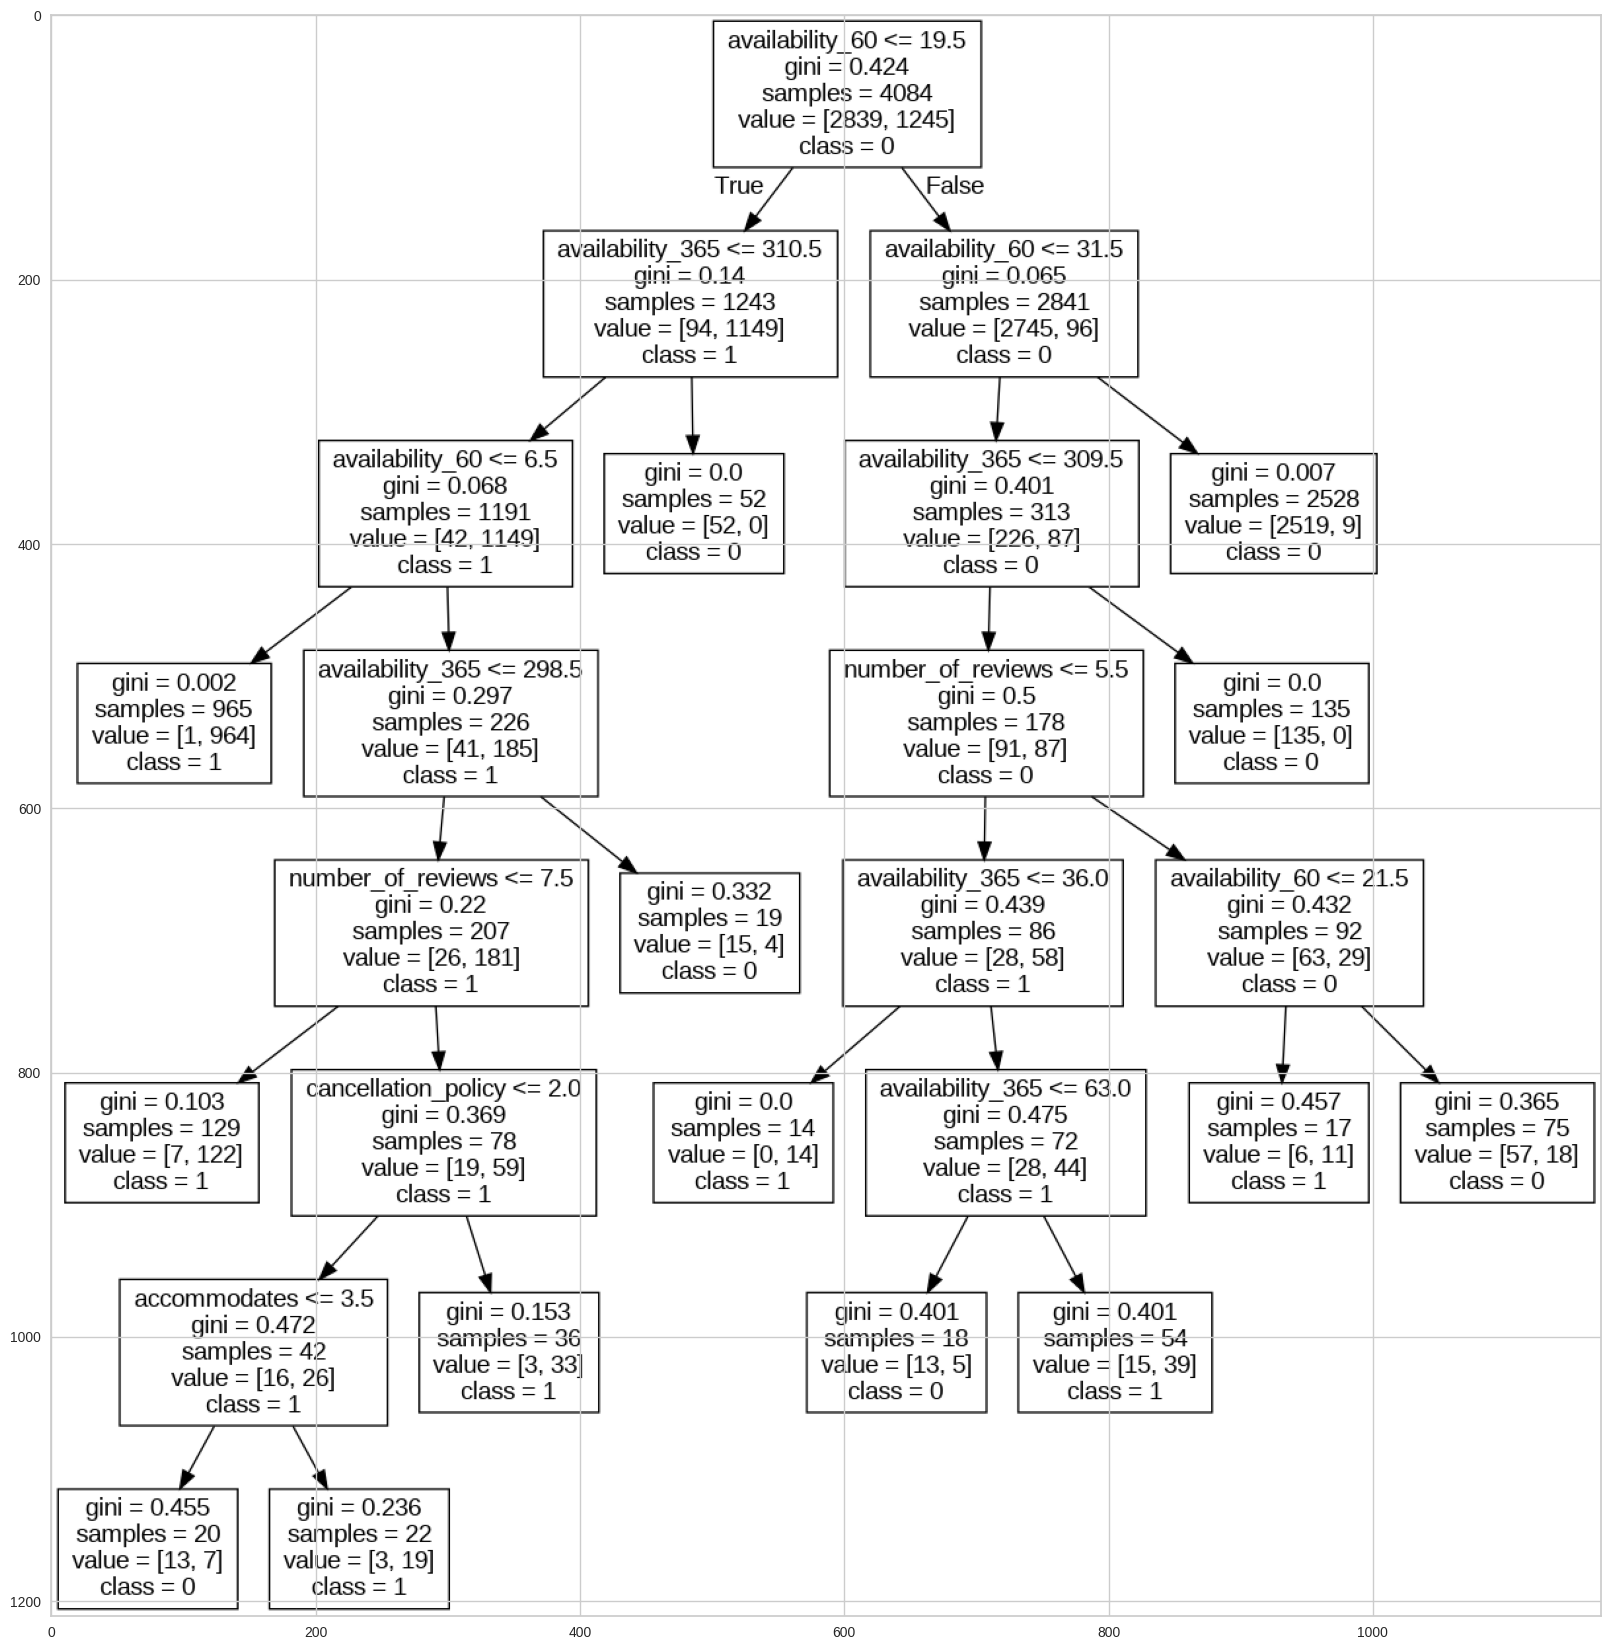

In [101]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X3.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

## Make predictions on training and test data

In [102]:
# make predictions on the training and test data
y_pred_train = dt.predict(X3_train)
y_pred_test = dt.predict(X3_test)

y_prob_train = dt.predict_proba(X3_train)
y_prob_test = dt.predict_proba(X3_test)

## Assess Model on training and testing data

In [103]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y3_train, y_pred_train)
prec_train = precision_score(y3_train, y_pred_train)
rec_train = recall_score(y3_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y3_test, y_pred_test)
prec_test = precision_score(y3_test, y_pred_test)
rec_test = recall_score(y3_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9809
Precision: 0.9717
Recall.  : 0.9655

 -- test set -- 
Accuracy : 0.9732
Precision: 0.9599
Recall.  : 0.9547


## Confusion Matrix

In [104]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y3_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y3_test)
print(conf_matrix)

[[2804   43]
 [  35 1202]]
[[1177   25]
 [  22  527]]


## ROC Curve for Training Data

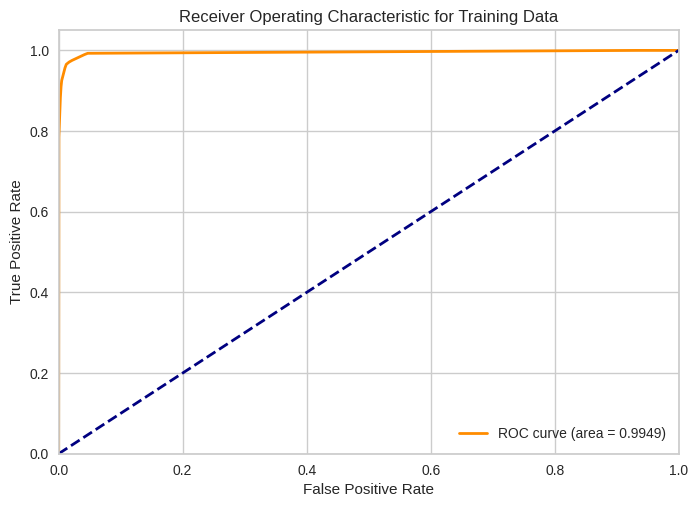

In [105]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y3_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y3_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

ROC Curve for Testing Data

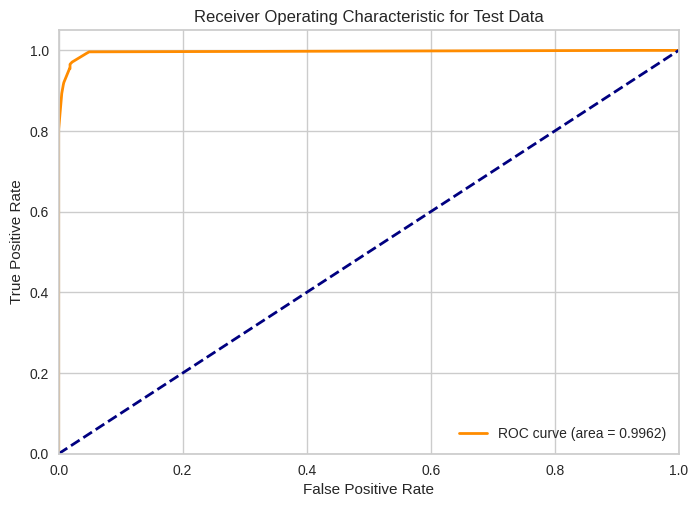

In [106]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y3_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y3_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

## Feature Importance

    importance                      feature
20      0.8896              availability_60
21      0.0956             availability_365
22      0.0093            number_of_reviews
7       0.0034                 accommodates
31      0.0021          cancellation_policy
17      0.0000                 extra_people
30      0.0000             instant_bookable
29      0.0000          review_scores_value
28      0.0000       review_scores_location
27      0.0000  review_scores_communication
26      0.0000        review_scores_checkin
25      0.0000    review_scores_cleanliness
24      0.0000       review_scores_accuracy
23      0.0000         review_scores_rating
19      0.0000              availability_30
18      0.0000               minimum_nights
0       0.0000           host_response_time
1       0.0000           host_response_rate
15      0.0000                 cleaning_fee
14      0.0000             security_deposit
13      0.0000                 weekly_price
12      0.0000                  

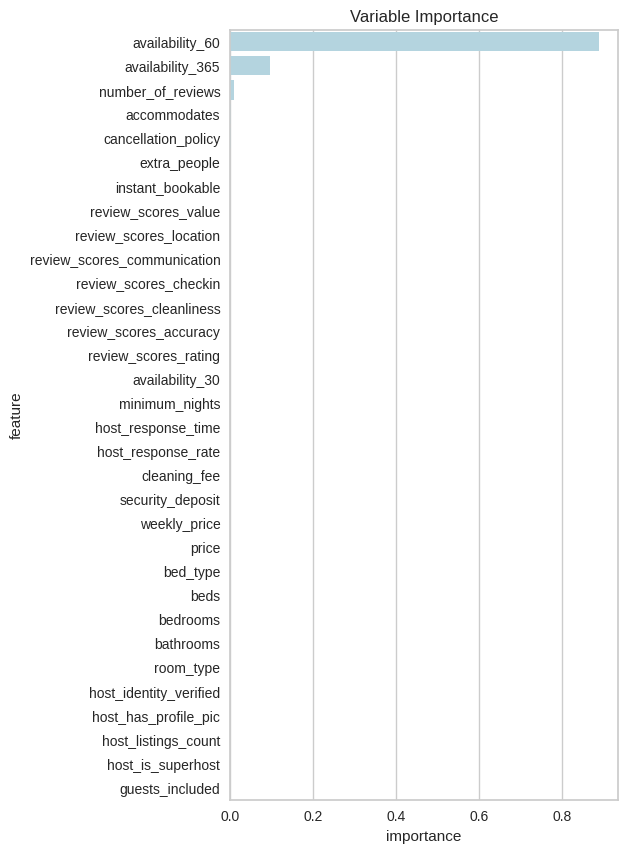

In [107]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df_feature_importance = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df_feature_importance['feature']=X3.columns

#sort data so features with largest importance values are at the top
df2 = df_feature_importance.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# K-Means Clustering
- Through k-means clustering, we'll segment properties into distinct groups. We'll profile each segment to see which ones command the highest rates, have the best guest ratings, and boast the highest booking percentages.


## Standardize Data using StandardScaler

In [85]:
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [86]:
#Standardize Data
dfcolumns = df.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()

host_response_time  host_response_rate  host_is_superhost  \
0              0.6993             -1.5302            -0.4067   
1              0.6993             -1.5302            -0.4067   
2              0.6993             -1.5302            -0.4067   
3              0.6993             -1.5302            -0.4067   
4             -0.5928              0.7104            -0.4067   

   host_listings_count  host_has_profile_pic  host_identity_verified  \
0              -0.1950                0.0473                 -1.4414   
1              -0.1950                0.0473                  0.6938   
2              -0.1768                0.0473                  0.6938   
3              -0.1768                0.0473                  0.6938   
4               5.2512                0.0473                  0.6938   

   room_type  accommodates  bathrooms  bedrooms  ...  review_scores_rating  \
0     1.3191        0.5995     1.3255   -0.6494  ...                0.6133   
1     1.3191       -0.8882    -1.9100   -0.6494  ...                0.2786   
2     1.3191       -0.8882     0.0313   -0.6494  ...                0.2786   
3     1.3191       -0.8882     0.0313   -0.6494  ...                0.2786   
4    -0.6359        0.5995     0.6784    1.1106  ...                0.2786   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                  0.3625                     0.4009                 0.2418   
1                  0.3625                     0.4009                 0.2418   
2                  0.3625                     0.4009                 0.2418   
3                  0.3625                     0.4009                 0.2418   
4                  0.3625                     0.4009                 0.2418   

   review_scores_communication  review_scores_location  review_scores_value  \
0                       0.2265                  0.4801               0.4905   
1                       0.2265                  0.4801               0.4905   
2                       0.2265                  0.4801               0.4905   
3                       0.2265                  0.4801               0.4905   
4                       0.2265                  0.4801               0.4905   

   instant_bookable  cancellation_policy  booked  
0           -0.3138              -0.3264  1.4990  
1           -0.3138              -0.3264 -0.6671  
2           -0.3138              -1.0719 -0.6671  
3           -0.3138              -1.0719 -0.6671  
4           -0.3138               1.1645 -0.6671  

[5 rows x 33 columns]

## How many Clusters do we need?
- Create an Elbow plot to provide guidance on how many clusters might be needed

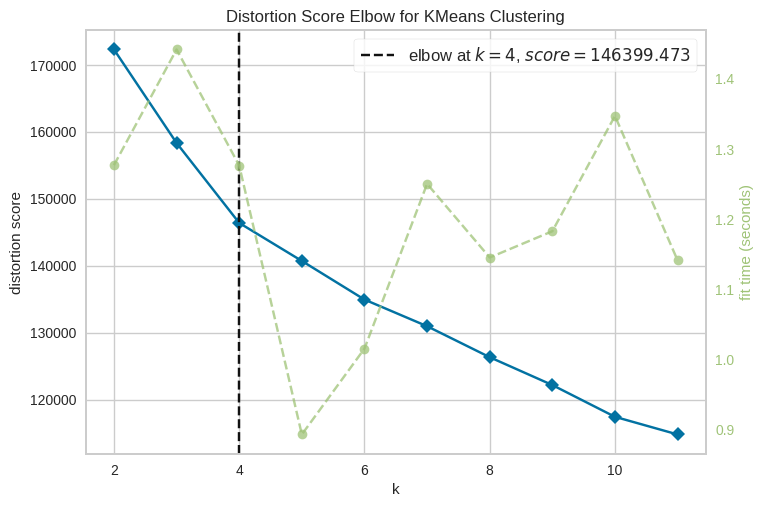

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

#Generate Clusters and Begin Profiling
- Evaluate cluster sizes
- Compute the mean of each input variable within each cluster

In [88]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=4, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
df['cluster']=clusters

df.info()

# Evaluate cluster sizes to insure that they are similar
print(df['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df.groupby('cluster').mean()
print(df_desc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_response_time           5835 non-null   int64   
 1   host_response_rate           5835 non-null   int64   
 2   host_is_superhost            5835 non-null   int64   
 3   host_listings_count          5835 non-null   float64 
 4   host_has_profile_pic         5835 non-null   int64   
 5   host_identity_verified       5835 non-null   int64   
 6   room_type                    5835 non-null   int64   
 7   accommodates                 5835 non-null   int64   
 8   bathrooms                    5835 non-null   float64 
 9   bedrooms                     5835 non-null   float64 
 10  beds                         5835 non-null   float64 
 11  bed_type                     5835 non-null   int64   
 12  price                        5835 non-null   float64 
 13  wee

In [111]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Examine the means of each variable by cluster
df_desc = df.groupby('cluster').mean()
print(df_desc)

# Reset display options to the default values if needed
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


         host_response_time  host_response_rate  host_is_superhost  \
cluster                                                              
0                    2.3075             79.9500             0.0325   
1                    2.5412             54.0717             0.1003   
2                    2.3799             71.8355             0.1479   
3                    2.4645             70.4411             0.1790   

         host_listings_count  host_has_profile_pic  host_identity_verified  \
cluster                                                                      
0                    47.1575                1.0000                  0.7800   
1                     4.6015                0.9981                  0.6263   
2                    27.5388                1.0000                  0.7680   
3                     4.5326                0.9964                  0.6514   

         room_type  accommodates  bathrooms  bedrooms   beds  bed_type  \
cluster                             

# Profile Clusters
- The following code profiles the clusters for one variable
- You should repeat this for any variables of interest - This could include variables that stand out as being important in the preliminary cluster analysis OR this could be other variables (particularly categorical variables) that were not used to generate the cluster but are of interest from a business perspective.  For example, you may want to examine the distrubtion of booked airbnbs within each of these clusters to determine whether certain clusters have a higher percentage of airbnbs that are booked (even though booked was not used as an input for creating the clusters)

Airbnbs and Booking


<Figure size 800x400 with 0 Axes>

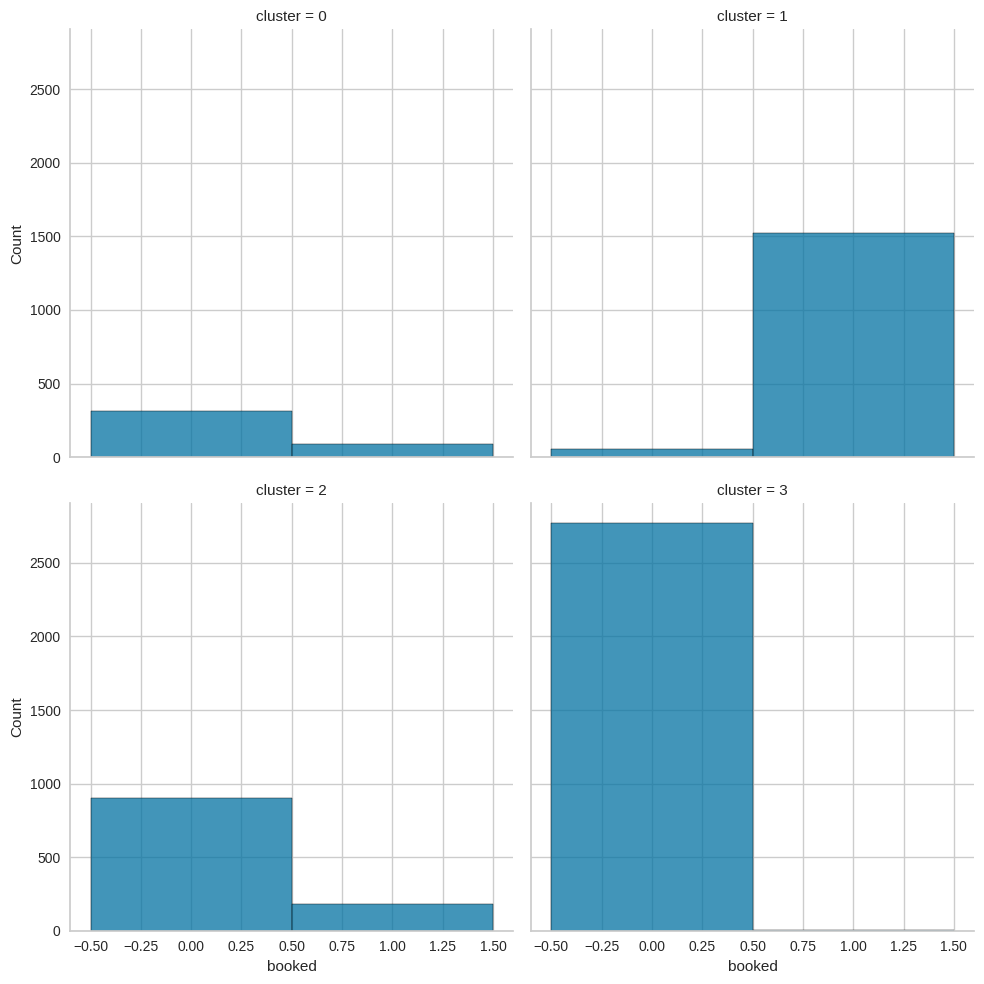

In [89]:
#day charge eve charge night charge Intl min
plt.figure(figsize=(8,4))
print("Airbnbs and Booking")
sns.displot(data=df, x="booked", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [90]:
dfbooked = df[['booked', 'cluster']]

df_desc1 = dfbooked.groupby('cluster').describe()
print(df_desc1)

        booked                 
         count unique top  freq
cluster                        
0          400      2   0   314
1         1576      2   1  1523
2         1082      2   0   902
3         2777      2   0  2769


## Silhoutte Scoring
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


For n_clusters = 2 The average silhouette_score is : 0.17948463298925854
For n_clusters = 3 The average silhouette_score is : 0.12027695992742143
For n_clusters = 4 The average silhouette_score is : 0.12301014673097689
For n_clusters = 5 The average silhouette_score is : 0.135440962734199
For n_clusters = 6 The average silhouette_score is : 0.13423321168748004


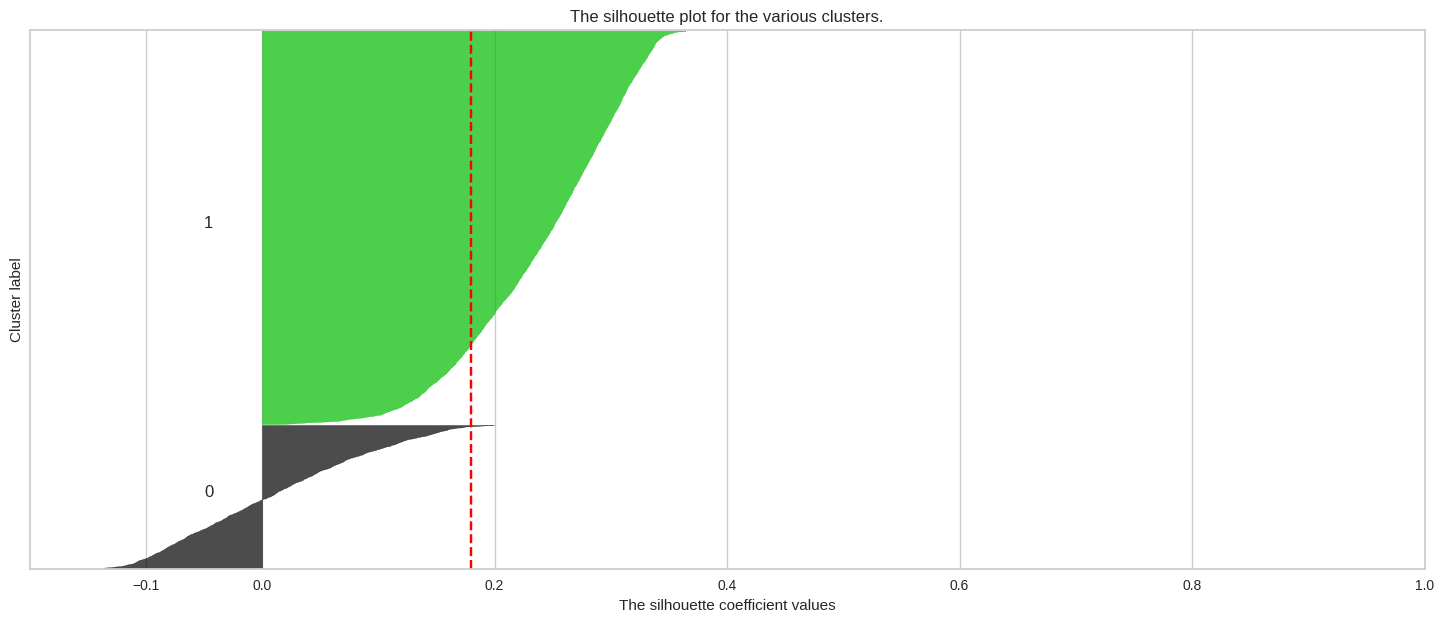

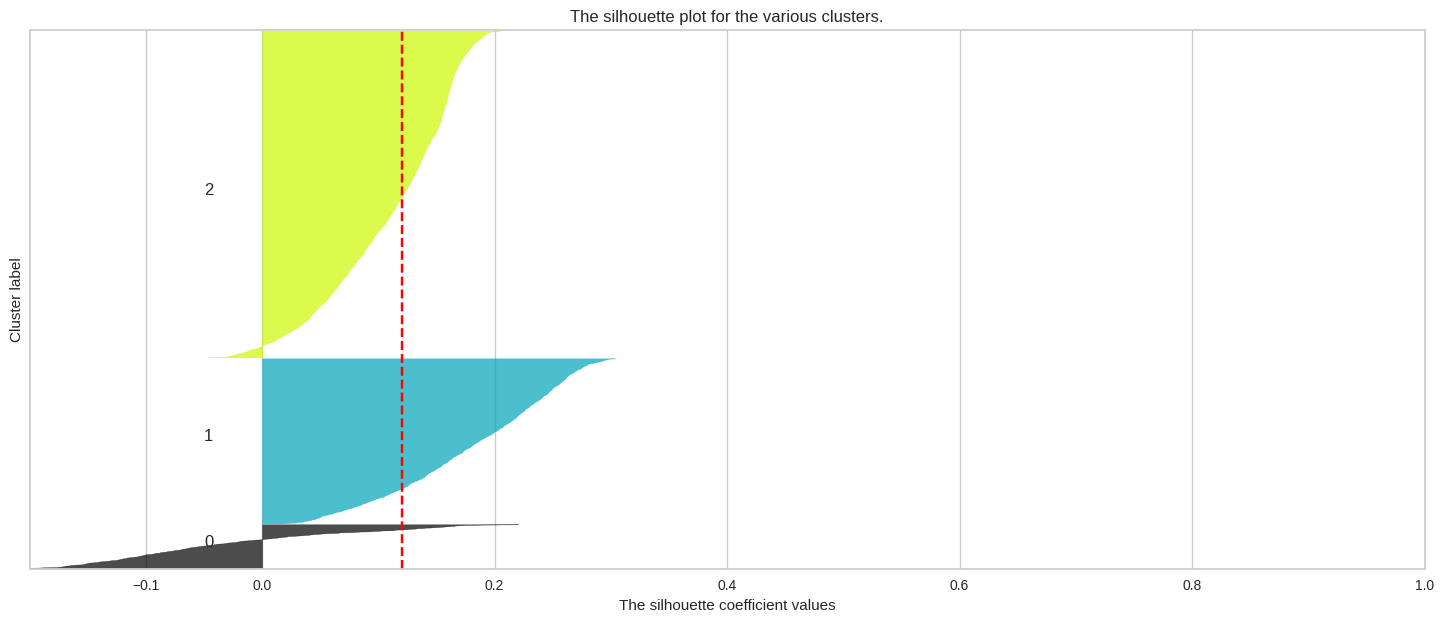

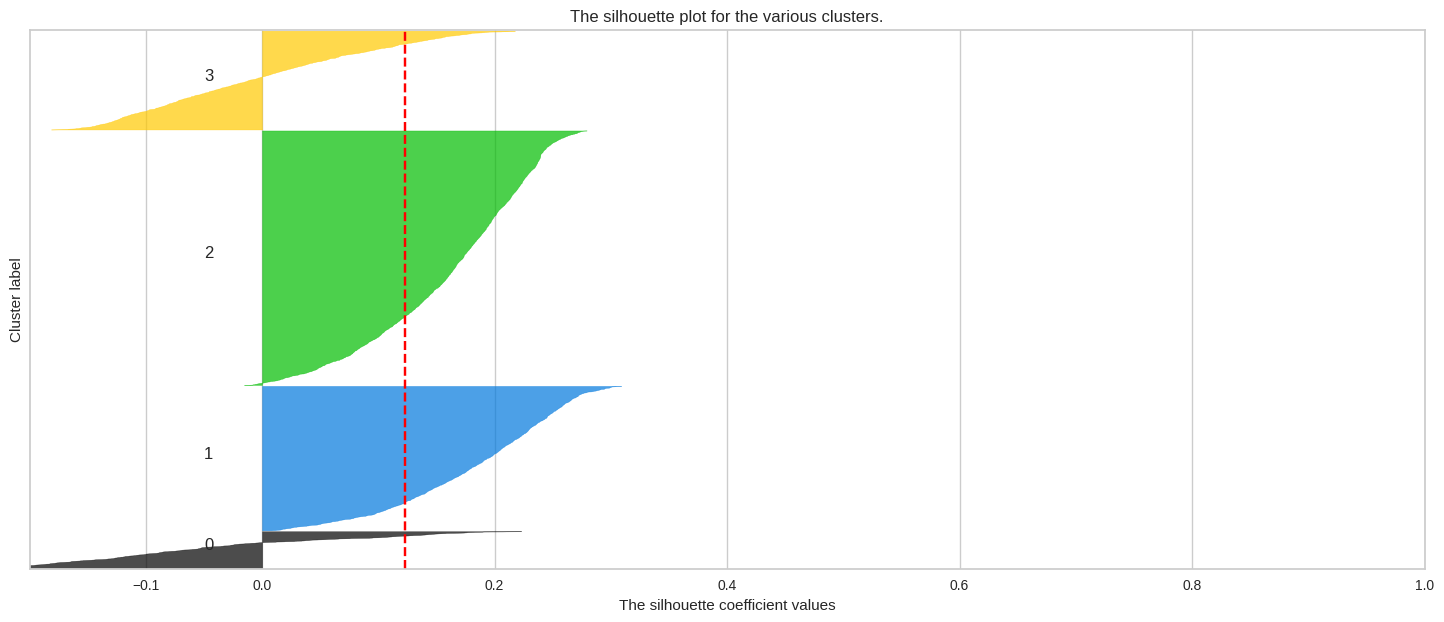

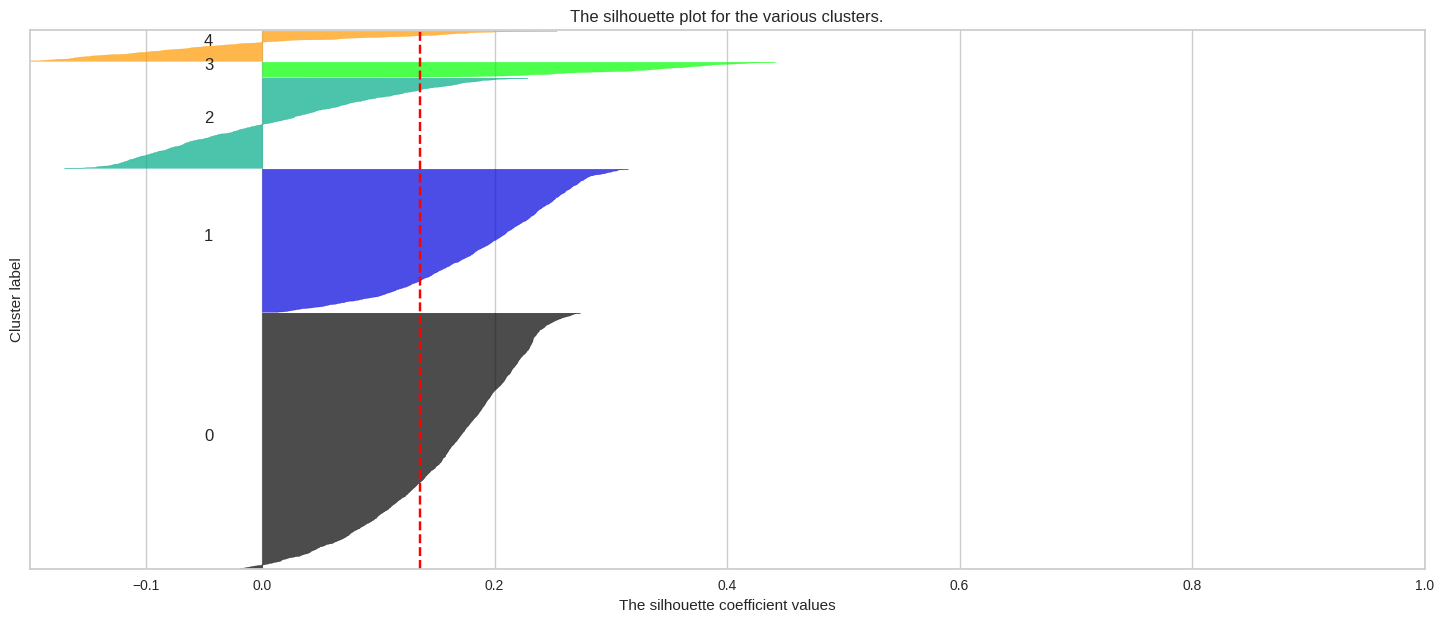

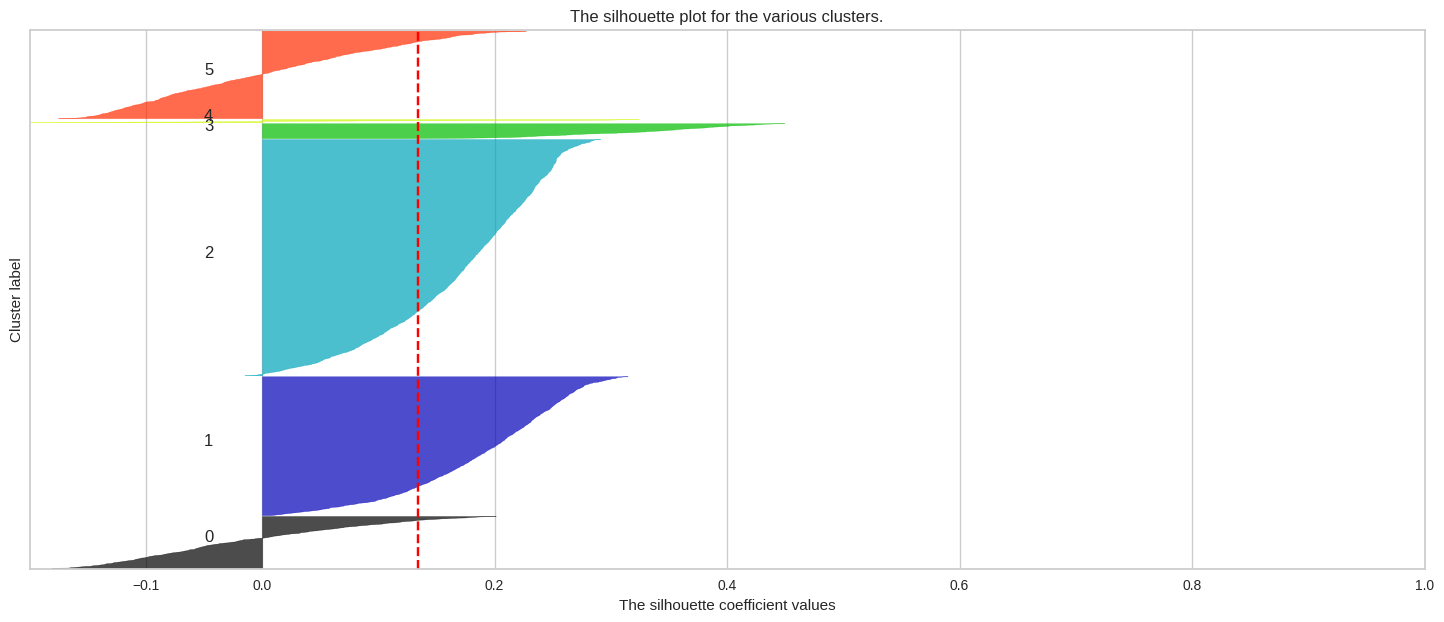

In [91]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_scaled
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



# K-Means Clustering For Ratings and Guest Reviews

In [92]:
df_2=df[['review_scores_rating','review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_checkin',
        'review_scores_location', 'host_listings_count', 'bathrooms', 'host_response_rate']]

In [93]:
#Standardize Data
df_2columns = df_2.columns.values.tolist()

scaler = StandardScaler()

df_2_scaled = scaler.fit_transform(df_2.to_numpy())
df_2_scaled = pd.DataFrame(df_2_scaled, columns=df_2columns)


df_2_scaled.head()

review_scores_rating  review_scores_value  review_scores_cleanliness  \
0                0.6133               0.4905                     0.4009   
1                0.2786               0.4905                     0.4009   
2                0.2786               0.4905                     0.4009   
3                0.2786               0.4905                     0.4009   
4                0.2786               0.4905                     0.4009   

   review_scores_communication  review_scores_accuracy  review_scores_checkin  \
0                       0.2265                  0.3625                 0.2418   
1                       0.2265                  0.3625                 0.2418   
2                       0.2265                  0.3625                 0.2418   
3                       0.2265                  0.3625                 0.2418   
4                       0.2265                  0.3625                 0.2418   

   review_scores_location  host_listings_count  bathrooms  host_response_rate  
0                  0.4801              -0.1950     1.3255             -1.5302  
1                  0.4801              -0.1950    -1.9100             -1.5302  
2                  0.4801              -0.1768     0.0313             -1.5302  
3                  0.4801              -0.1768     0.0313             -1.5302  
4                  0.4801               5.2512     0.6784              0.7104

## How many Clusters do we need?
- Create an Elbow plot to provide guidance on how many clusters might be needed

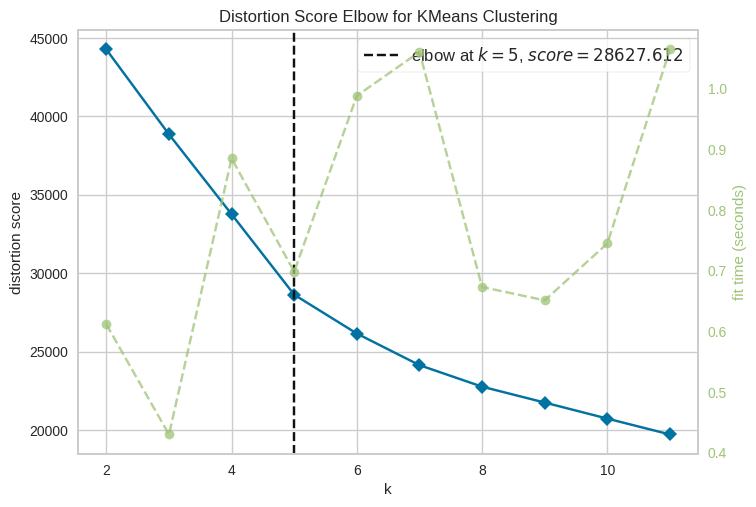

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_2_scaled)
visualizer.show()

## Generate Clusters and Begin Profiling
- Evaluate cluster sizes
- Compute the mean of each input variable within each cluster

In [95]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=5, random_state=904)
kmclus=kmeans.fit(df_2_scaled)

clusters = kmeans.fit_predict(df_2_scaled)

#append cluster to original data
df_2['cluster']=clusters

df_2.info()

# Evaluate cluster sizes to insure that they are similar
print(df_2['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df_2.groupby('cluster').mean()
print(df_desc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         5835 non-null   float64
 1   review_scores_value          5835 non-null   float64
 2   review_scores_cleanliness    5835 non-null   float64
 3   review_scores_communication  5835 non-null   float64
 4   review_scores_accuracy       5835 non-null   float64
 5   review_scores_checkin        5835 non-null   float64
 6   review_scores_location       5835 non-null   float64
 7   host_listings_count          5835 non-null   float64
 8   bathrooms                    5835 non-null   float64
 9   host_response_rate           5835 non-null   int64  
 10  cluster                      5835 non-null   int32  
dtypes: float64(9), int32(1), int64(1)
memory usage: 478.8 KB
3    3288
1    1636
2     709
4     163
0      39
Name: cluster, dtype: int64

## Profile Clusters
- The following code profiles the clusters for one variable
- You should repeat this for any variables of interest - This could include variables that stand out as being important in the preliminary cluster analysis OR this could be other variables (particularly categorical variables) that were not used to generate the cluster but are of interest from a business perspective.  For example, you may want to examine the distrubtion of booked airbnbs within each of these clusters to determine whether certain clusters have a higher percentage of airbnbs that are booked (even though booked was not used as an input for creating the clusters)

Ratings and Review


<Figure size 800x400 with 0 Axes>

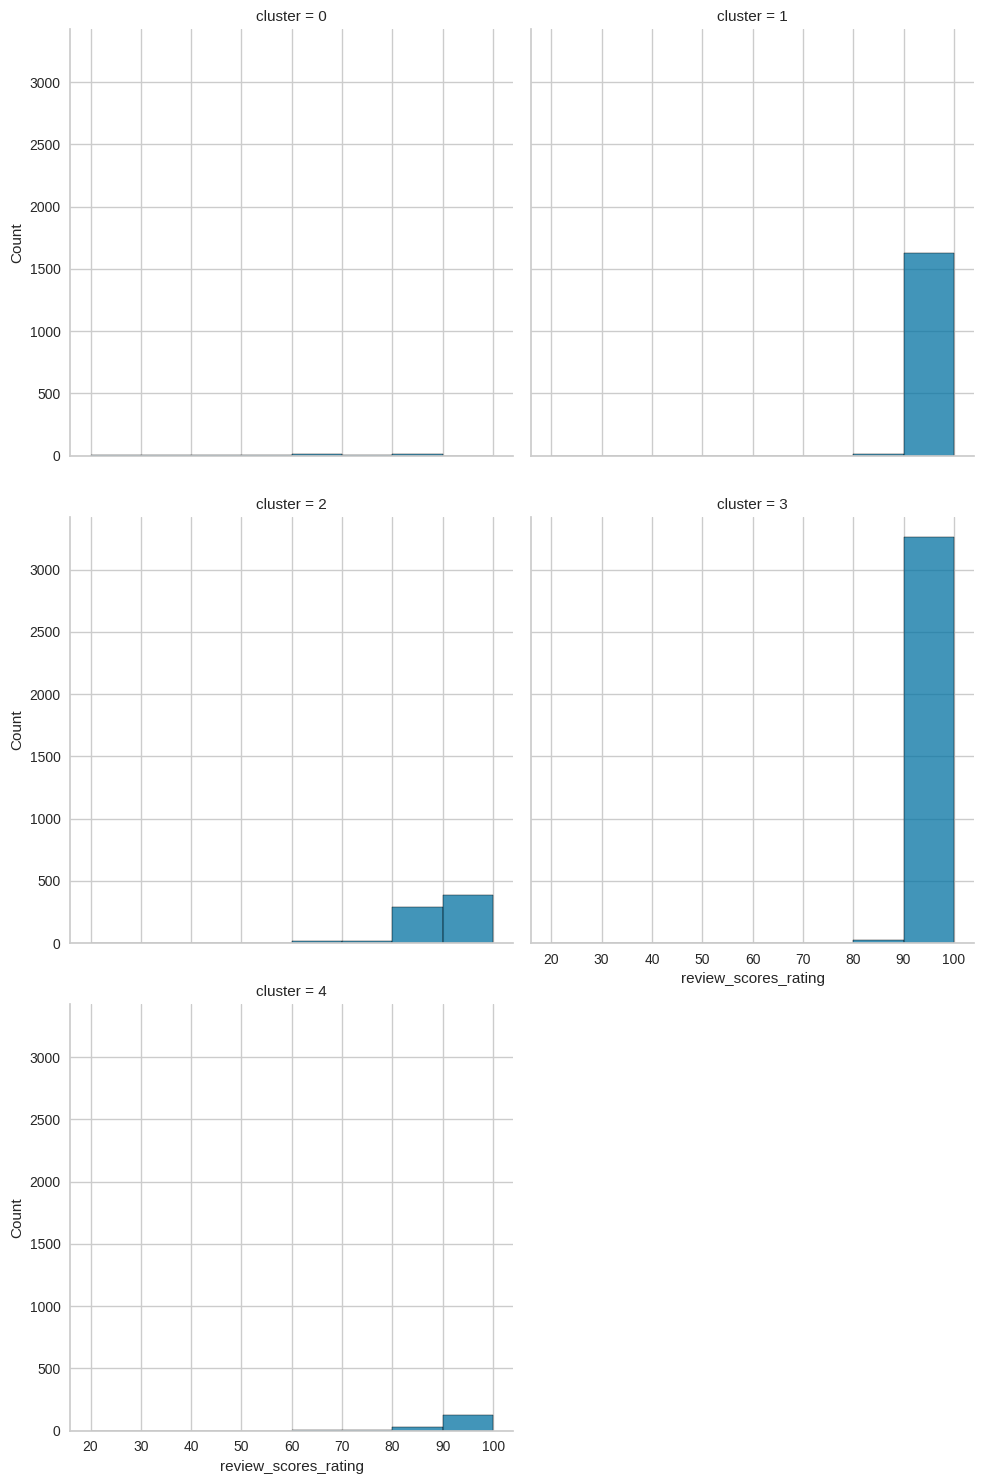

In [96]:
# Cluster vs Review Scores Rating
plt.figure(figsize=(8,4))
print("Ratings and Review")
sns.displot(data=df_2, x="review_scores_rating", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [97]:
df_2booked = df_2[['review_scores_rating', 'cluster']]

df_desc2 = df_2booked.groupby('cluster').describe()
print(df_desc2)

        review_scores_rating                                                   \
                       count    mean     std     min     25%     50%      75%   
cluster                                                                         
0                    39.0000 58.9231 21.8312 20.0000 51.5000 60.0000  80.0000   
1                  1636.0000 98.0416  1.7065 80.0000 98.0000 98.0000  98.0000   
2                   709.0000 88.3230  7.4855 60.0000 83.0000 90.0000  93.0000   
3                  3288.0000 97.8251  2.5836 80.0000 97.0000 98.0000 100.0000   
4                   163.0000 92.9448  7.8152 60.0000 90.0000 95.0000  99.0000   

                  
             max  
cluster           
0        80.0000  
1       100.0000  
2       100.0000  
3       100.0000  
4       100.0000  


## Silhoutte Scoring
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


For n_clusters = 2 The average silhouette_score is : 0.5599213666076936
For n_clusters = 3 The average silhouette_score is : 0.5633059915333206
For n_clusters = 4 The average silhouette_score is : 0.43541846046765575
For n_clusters = 5 The average silhouette_score is : 0.3329262873061916
For n_clusters = 6 The average silhouette_score is : 0.34681465125471045


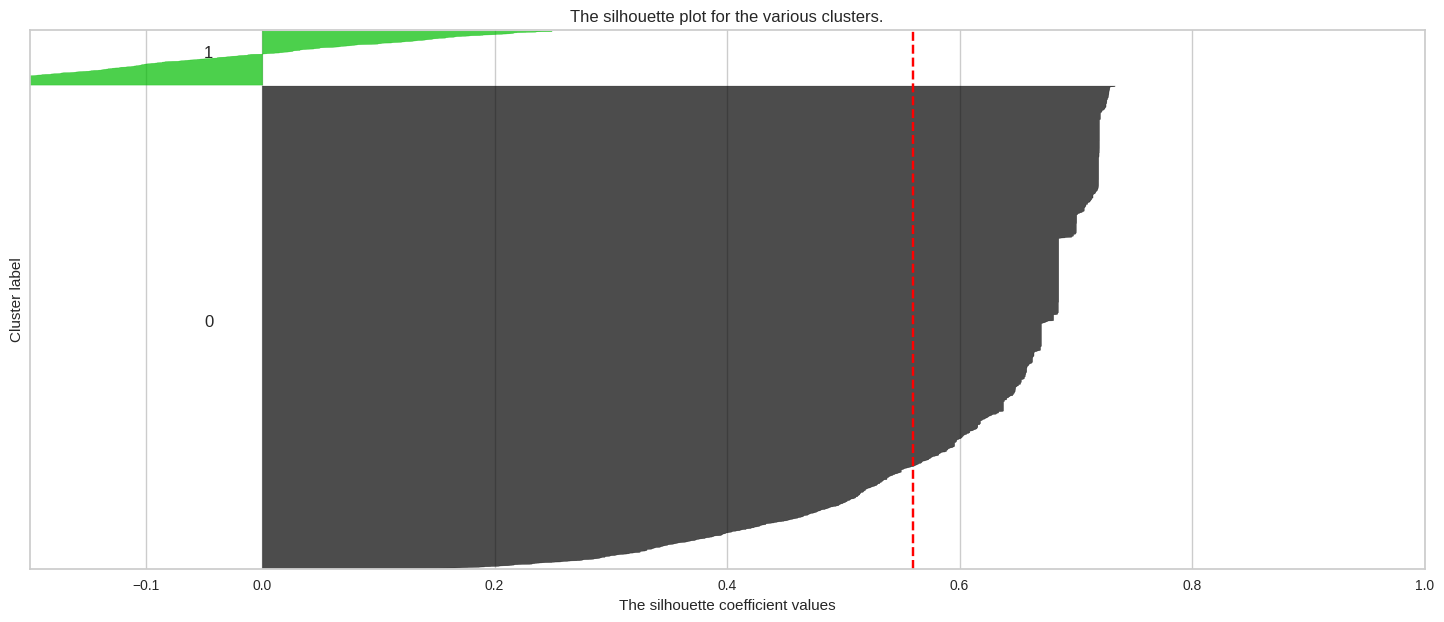

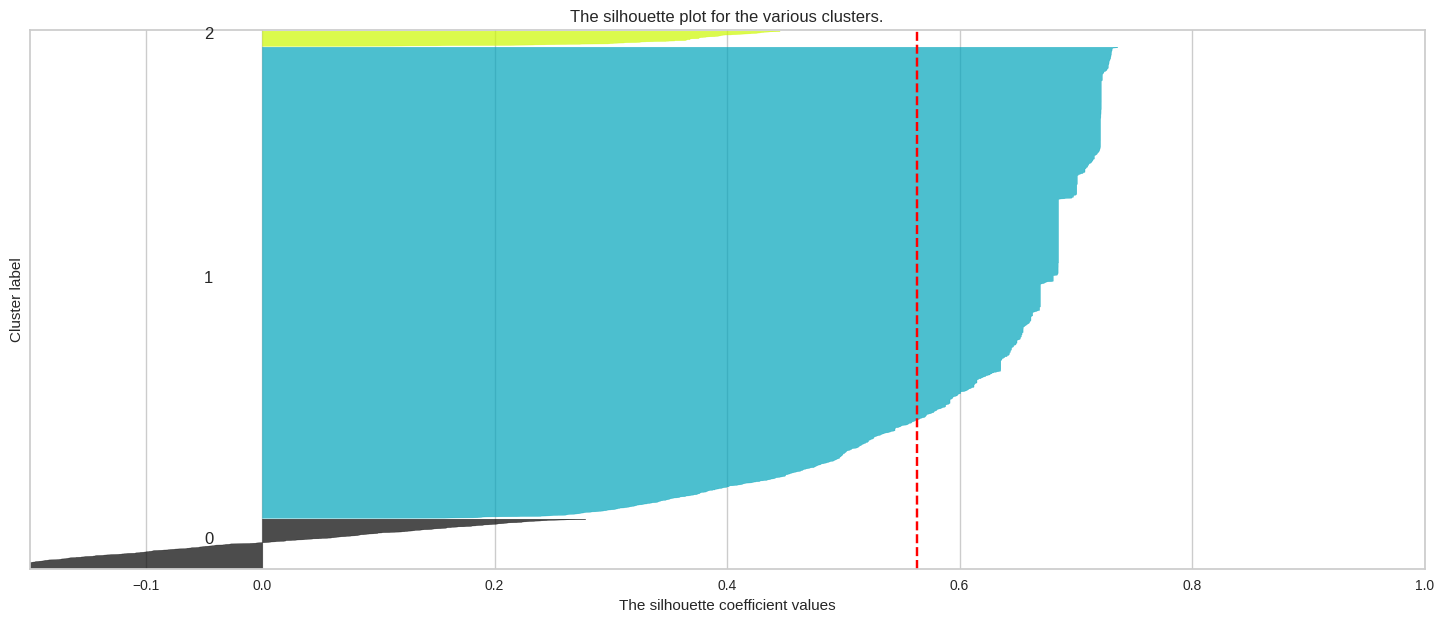

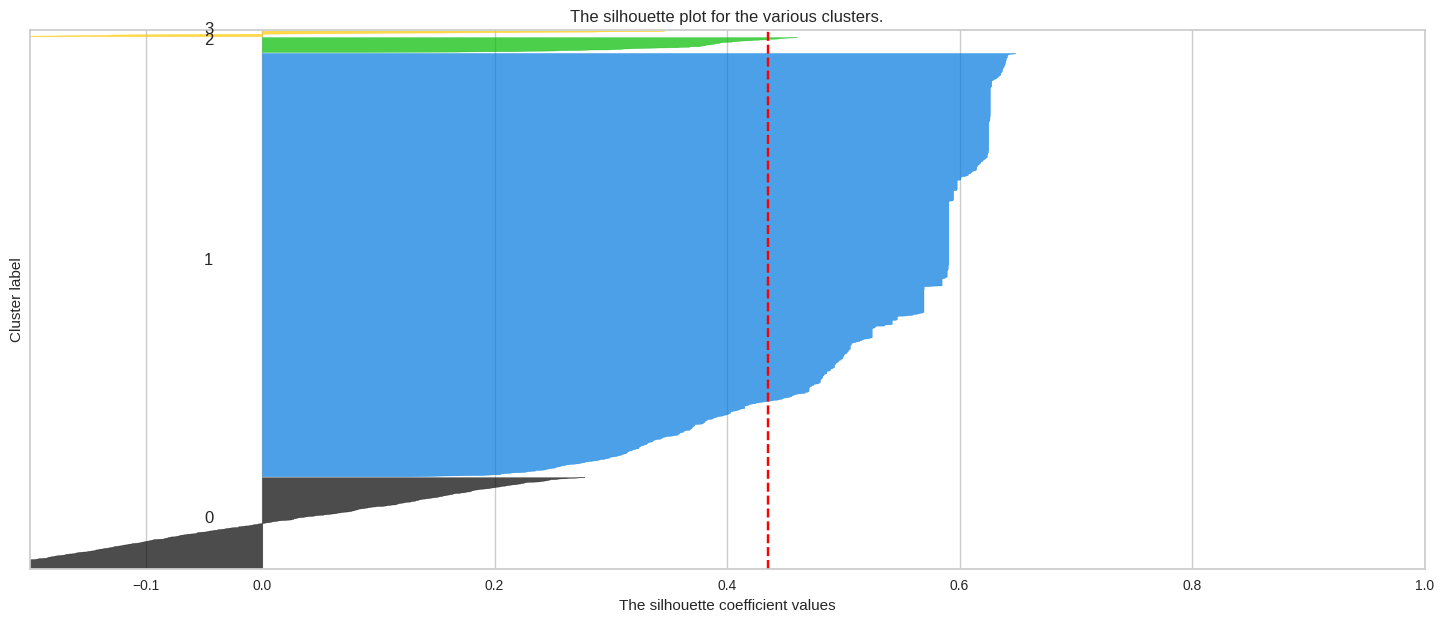

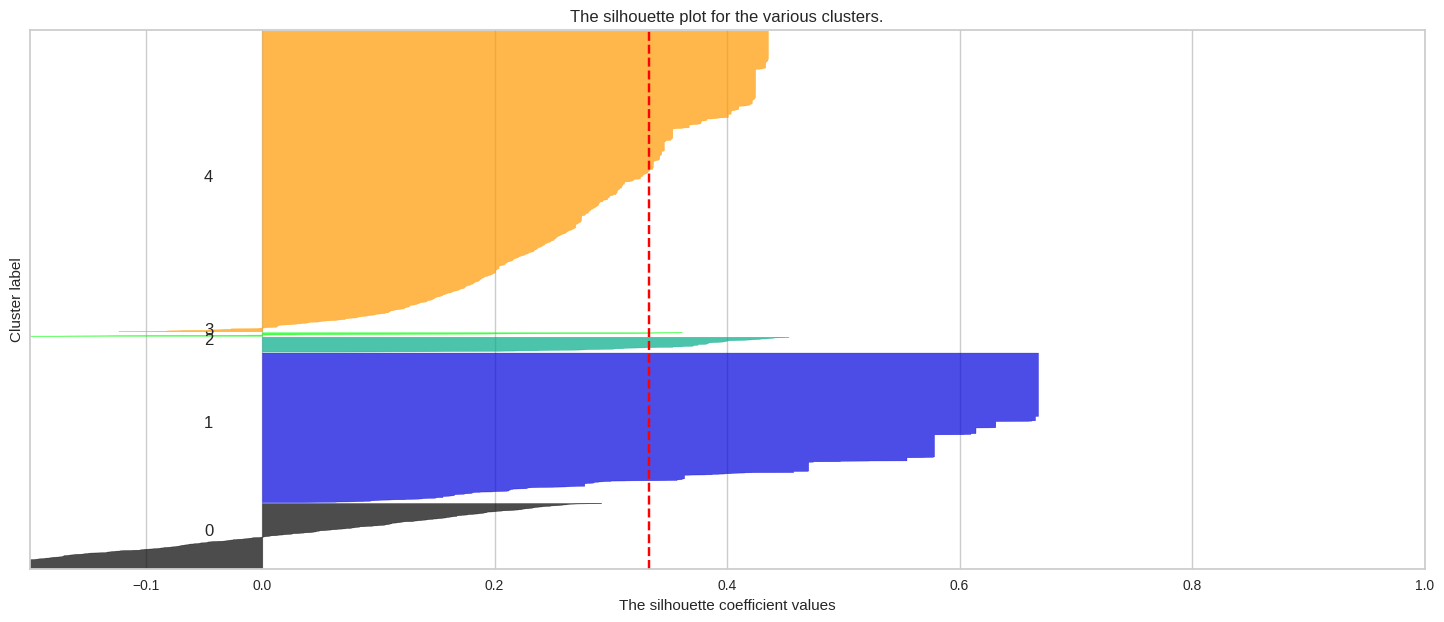

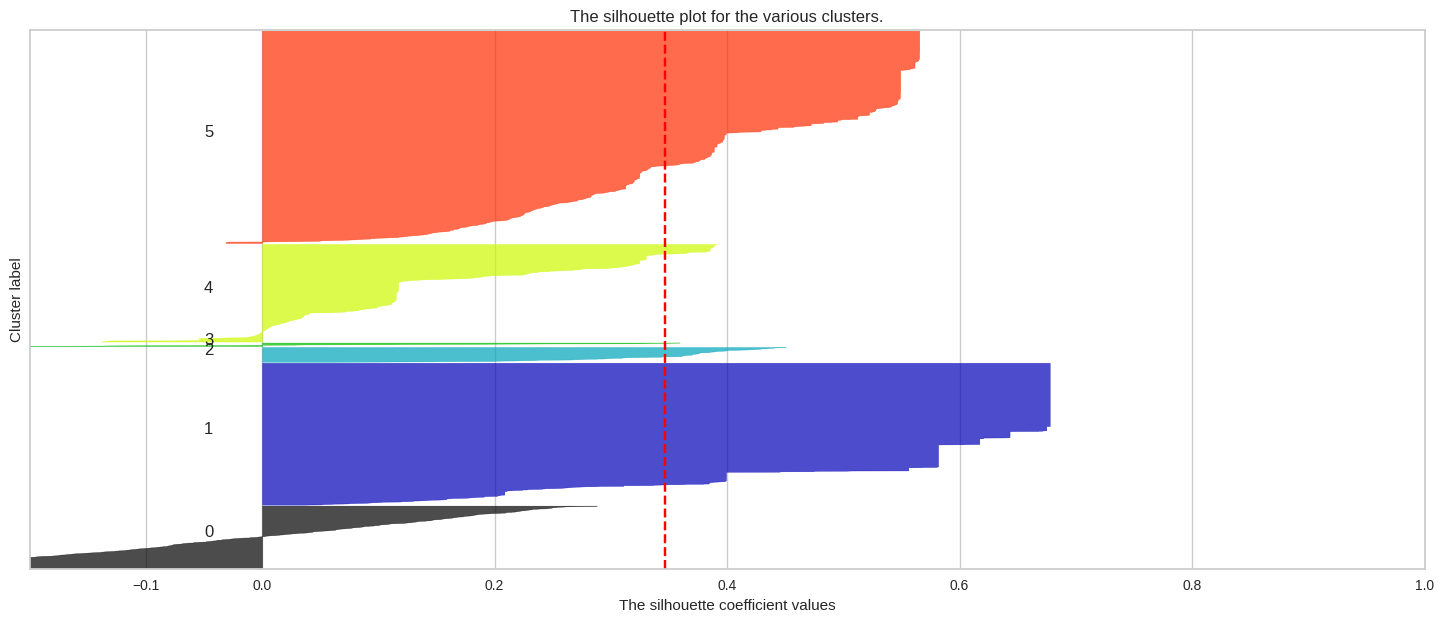

In [98]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_2_scaled
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

